# Random Forest - Regression

* [1) Linear Regression](#linear)

* [2) Polynomial Regression](#poly)

### Advanced Models
* [3) KNN Regression](#knn)
* [4) Decision Tree Regression](#tree)
* [5) Support Vector Regression](#svm)
* [6) Random Forest Regression](#forest)
* [7) Gradient Boosting](#gradient)
* [8) Adaboost](#ada)

## The Data

We just got hired by a tunnel boring company which uses X-rays in an attempt to know rock density, ideally this will allow them to switch out boring heads on their equipment before having to mine through the rock!

<img src='boring.jpg' height=400>

They have given us some lab test results of signal strength returned in nHz to their sensors for various rock density types tested. You will notice it has almost a sine wave like relationship, where signal strength oscillates based off the density, the researchers are unsure why this is.

**The project is to build a generalized model, which could use to accept a rebound signal, and output an expected rock density.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Data/rock_density_xray.csv')

In [3]:
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Rebound Signal Strength nHz  300 non-null    float64
 1   Rock Density kg/m3           300 non-null    float64
dtypes: float64(2)
memory usage: 4.8 KB


## rename the columns

In [5]:
df.columns=['Signal','Density']

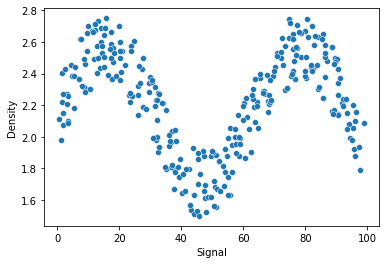

In [6]:
sns.scatterplot(data=df, x='Signal', y='Density');

------

## Splitting the Data

In [18]:
X =  df['Signal'].values.reshape(-1,1)  # as we only have single feature, we need to reshape the value =>  turn to numpy array => reshape it
y = df['Density']

In [13]:
X[:5] # before reshape

0    72.945124
1    14.229877
2    36.597334
3     9.578899
4    21.765897
Name: Signal, dtype: float64

In [16]:
X[:5] # after reshape

array([[72.94512436],
       [14.2298772 ],
       [36.59733361],
       [ 9.57889939],
       [21.76589708]])

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

# <a name='linear'>1) Linear Regression</a>

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
lr_model = LinearRegression()

In [23]:
lr_model.fit(X_train, y_train)

LinearRegression()

## Model Evaluation

In [24]:
lr_preds = lr_model.predict(X_test)

In [26]:
lr_preds

array([2.22029657, 2.22047771, 2.22035637, 2.22034337, 2.22039737,
       2.22050555, 2.22042659, 2.22028877, 2.22034673, 2.22029714,
       2.22041506, 2.22050153, 2.22043891, 2.22042003, 2.22047022,
       2.22032403, 2.22033377, 2.22030628, 2.22035154, 2.22035373,
       2.22029266, 2.22036798, 2.22033018, 2.22030611, 2.22042754,
       2.22044019, 2.2204142 , 2.22040303, 2.22048946, 2.22047495])

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [28]:
mean_absolute_error(y_test, lr_preds)

0.211198973318633

In [29]:
mean_squared_error(y_test, lr_preds)

0.06605167265148641

In [31]:
np.sqrt(mean_squared_error(y_test, lr_preds))

0.25700519965846297

In [32]:
# check the mean value of Density
df['Density'].mean()

2.225062949323796

In [33]:
100 * 0.211198973318633 / 2.225062949323796

9.491820147507156

So our model is off by abount 9.5% of the actual value based on MAE.

It seems like our model is performing not too bad. However, if we look closer to the value of predictions, the predicted values are very similar around (2... something). This indicates something is happening.

But, what does it looks like? We can make some predictions on new data to test out whether our assumption is correct or not.

## Predictions on new data and Visualization

In [36]:
signal_range = np.arange(0, 100)

In [39]:
signal_preds = lr_model.predict(signal_range.reshape(-1, 1))

We can compare the acutal shape of the data and Prediction of our model's shape.

**Our model is NOT even picking up the similar shape at all. All predictions are around 2.2 and fitting which looks like a line**

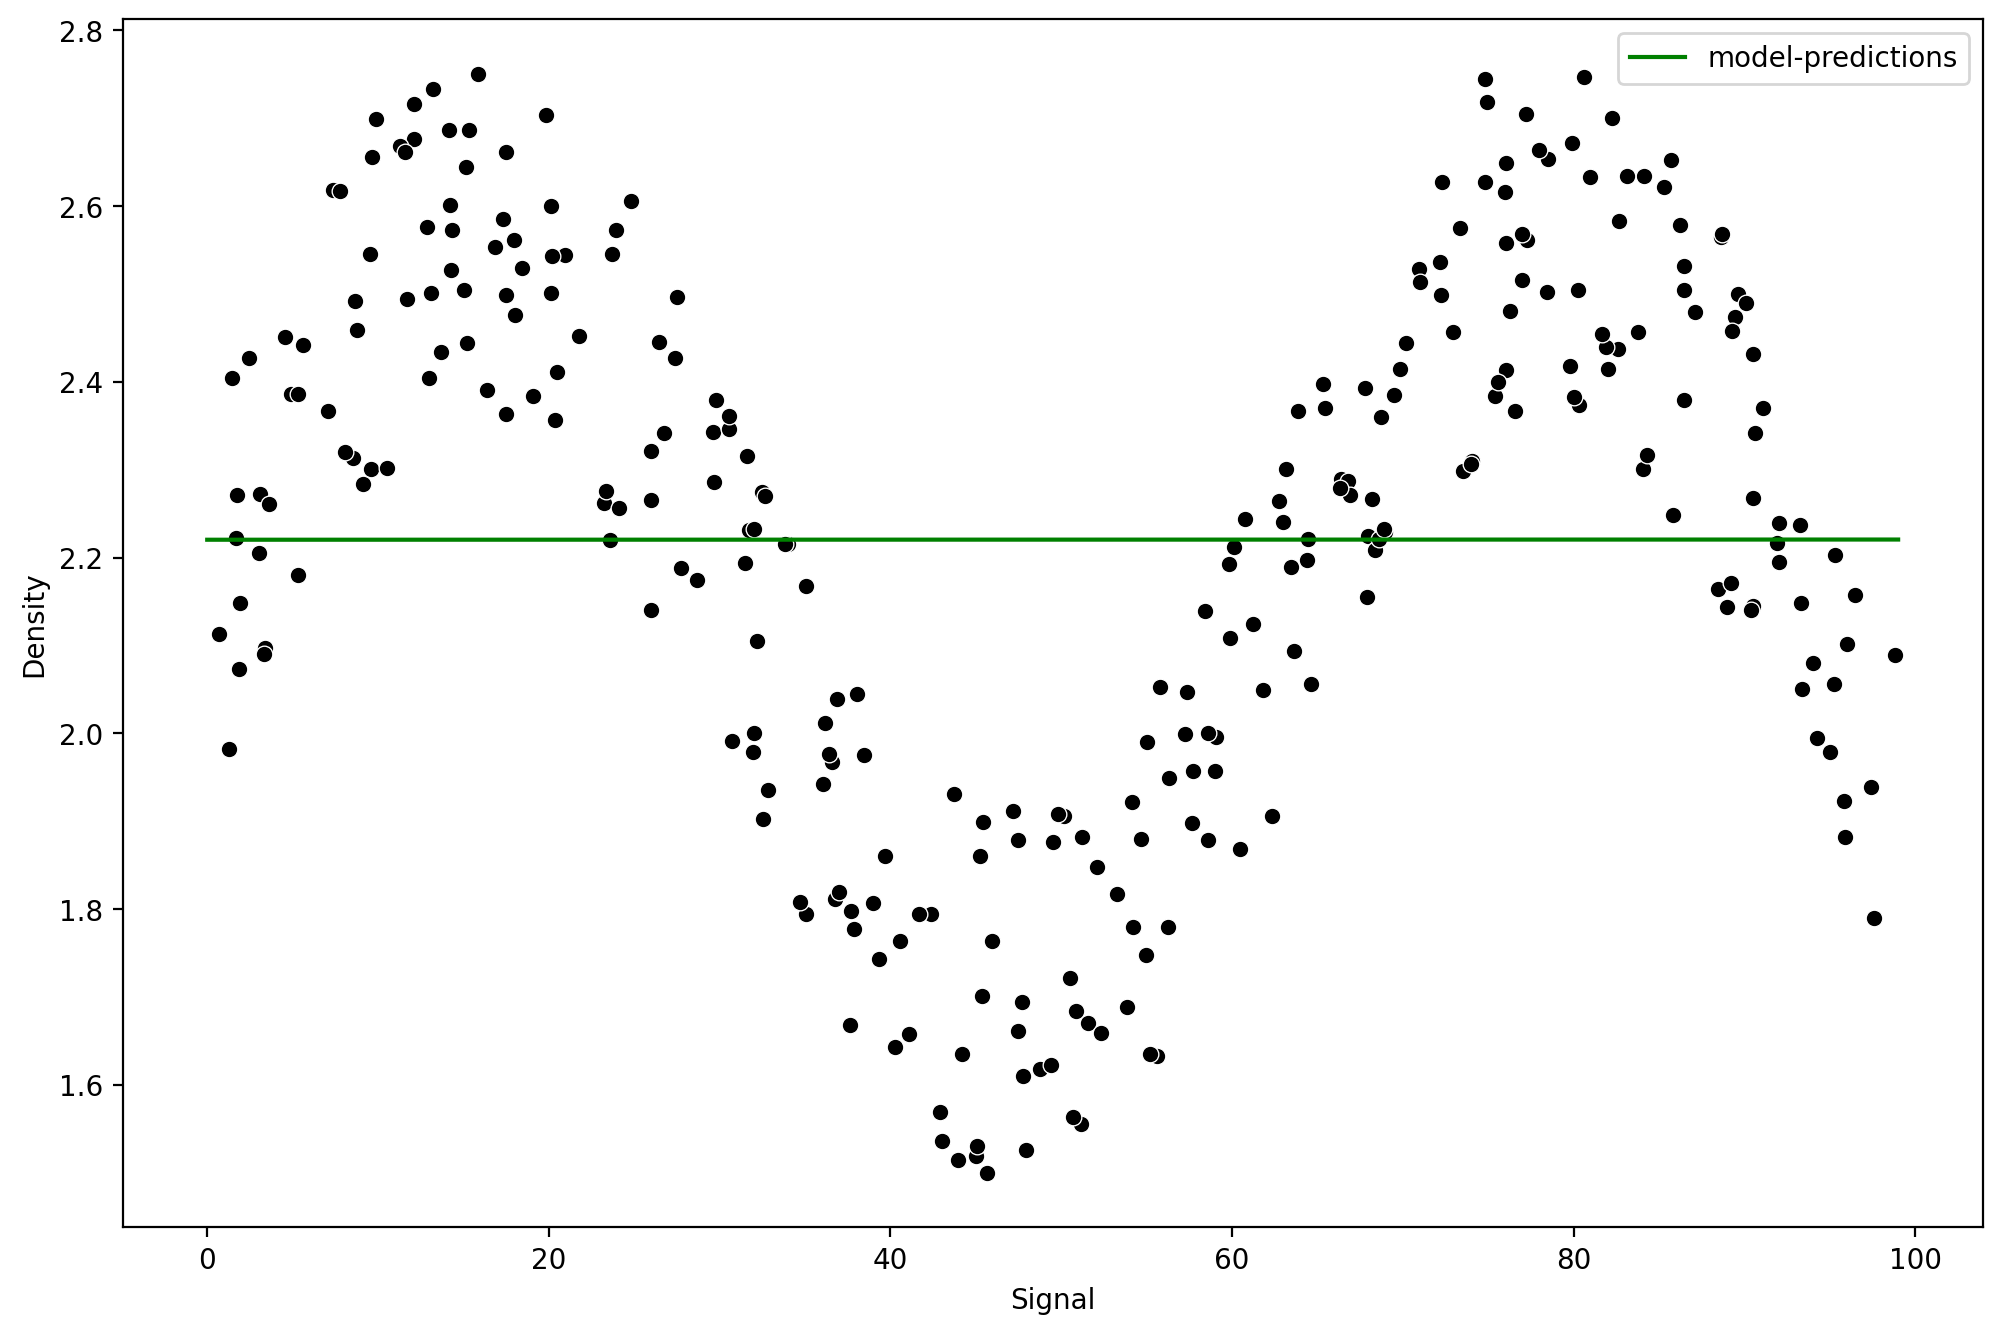

In [48]:
plt.figure(figsize=(12, 8), dpi=200)
sns.scatterplot(data=df, x='Signal', y='Density',color='black');

# what is my acutal model looks like for new singal range
plt.plot(signal_range, signal_preds, color='green', label='model-predictions');
plt.legend();

## Summary:

So our linear model is not working well enough, we need to explore more models.
* We need to look for any similarity of prediction values.
* Performance metrics like MAE is not enough
* Visulalization is important and helpful. We need to visualize the predictions against true values.


--------------
------------

# <a name='poly'>2) Polynomial Regression</a>

## Attempting with a Polynomial Regression Model

Let's explore why our standard regression approach of a polynomial could be difficult to fit here, keep in mind, we're in a fortunate situation where we can easily visualize results of y vs x.

### Helper function to run model

In [57]:
def run_model(model, X_train, X_test, y_train, y_test):
    # FIT MODEL TRAINING
    model.fit(X_train, y_train)
    
    # GET METRICS
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    print(f'MAE: {mae}')
    print(f'RMSE: {rmse}')
    
    # PLOT THE RESULTS against SIgnal Range
    signal_range = np.arange(0, 100)
    signal_preds = model.predict(signal_range.reshape(-1, 1))
    
    # true values 
    plt.figure(figsize=(12,8), dpi=200)
    sns.scatterplot(data=df, x='Signal', y='Density', color='black')
    
    # singal range predictions
    plt.plot(signal_range, signal_preds)

MAE: 0.211198973318633
RMSE: 0.25700519965846297


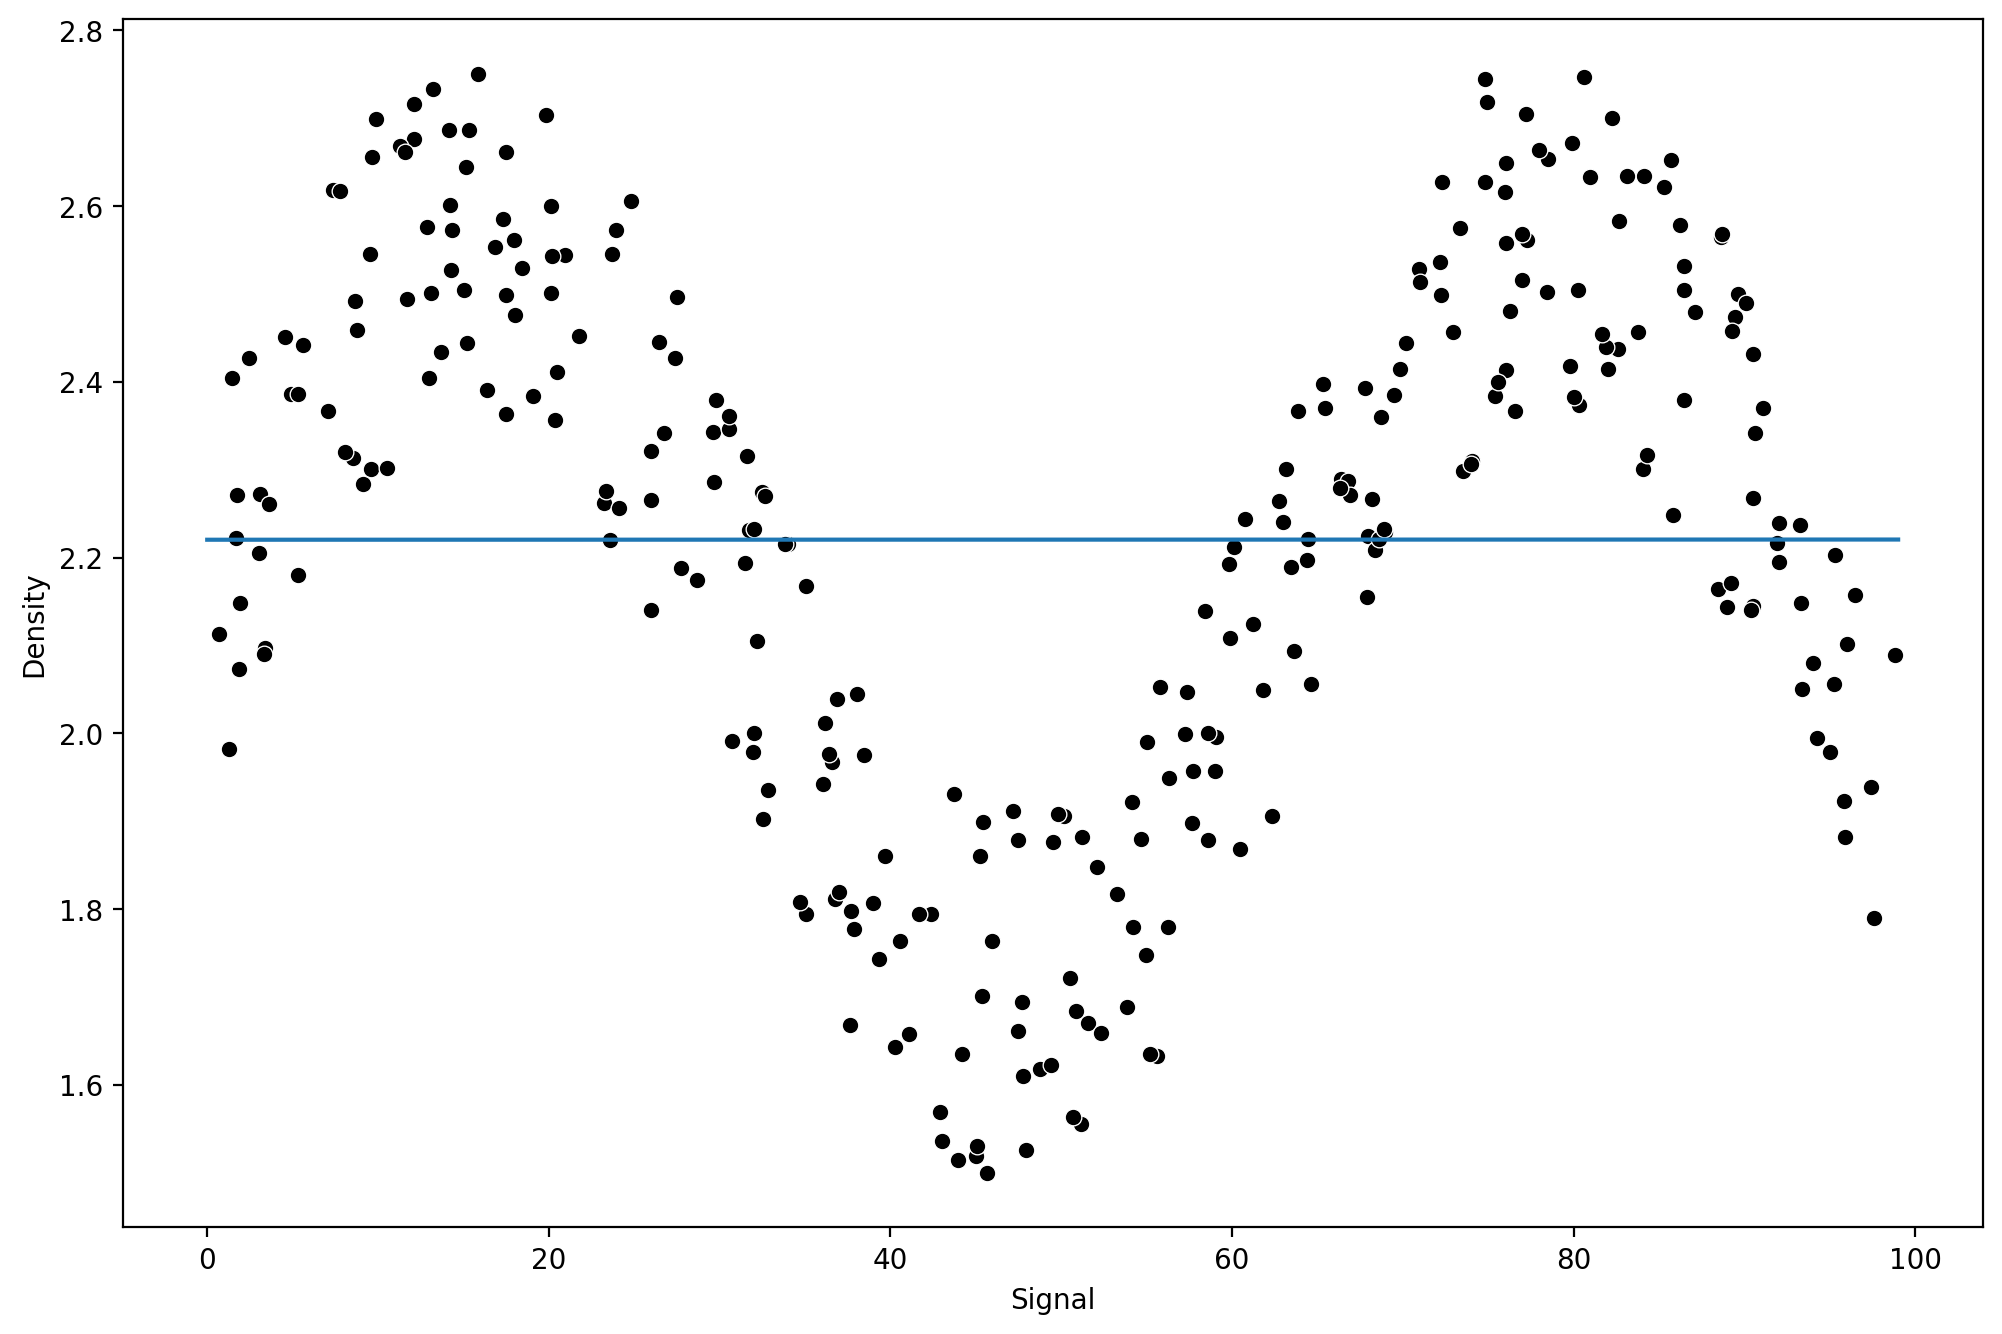

In [58]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

run_model(model, X_train, X_test, y_train, y_test)

----------

# Pipeline for Poly Orders

In [59]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

## 2 degree Polynomial

In [60]:
pipe = make_pipeline(PolynomialFeatures(degree=2), LinearRegression()) # make piepline with 2nd degree polynomail model using linear regression

MAE: 0.22903105443511335
RMSE: 0.28173095637255957


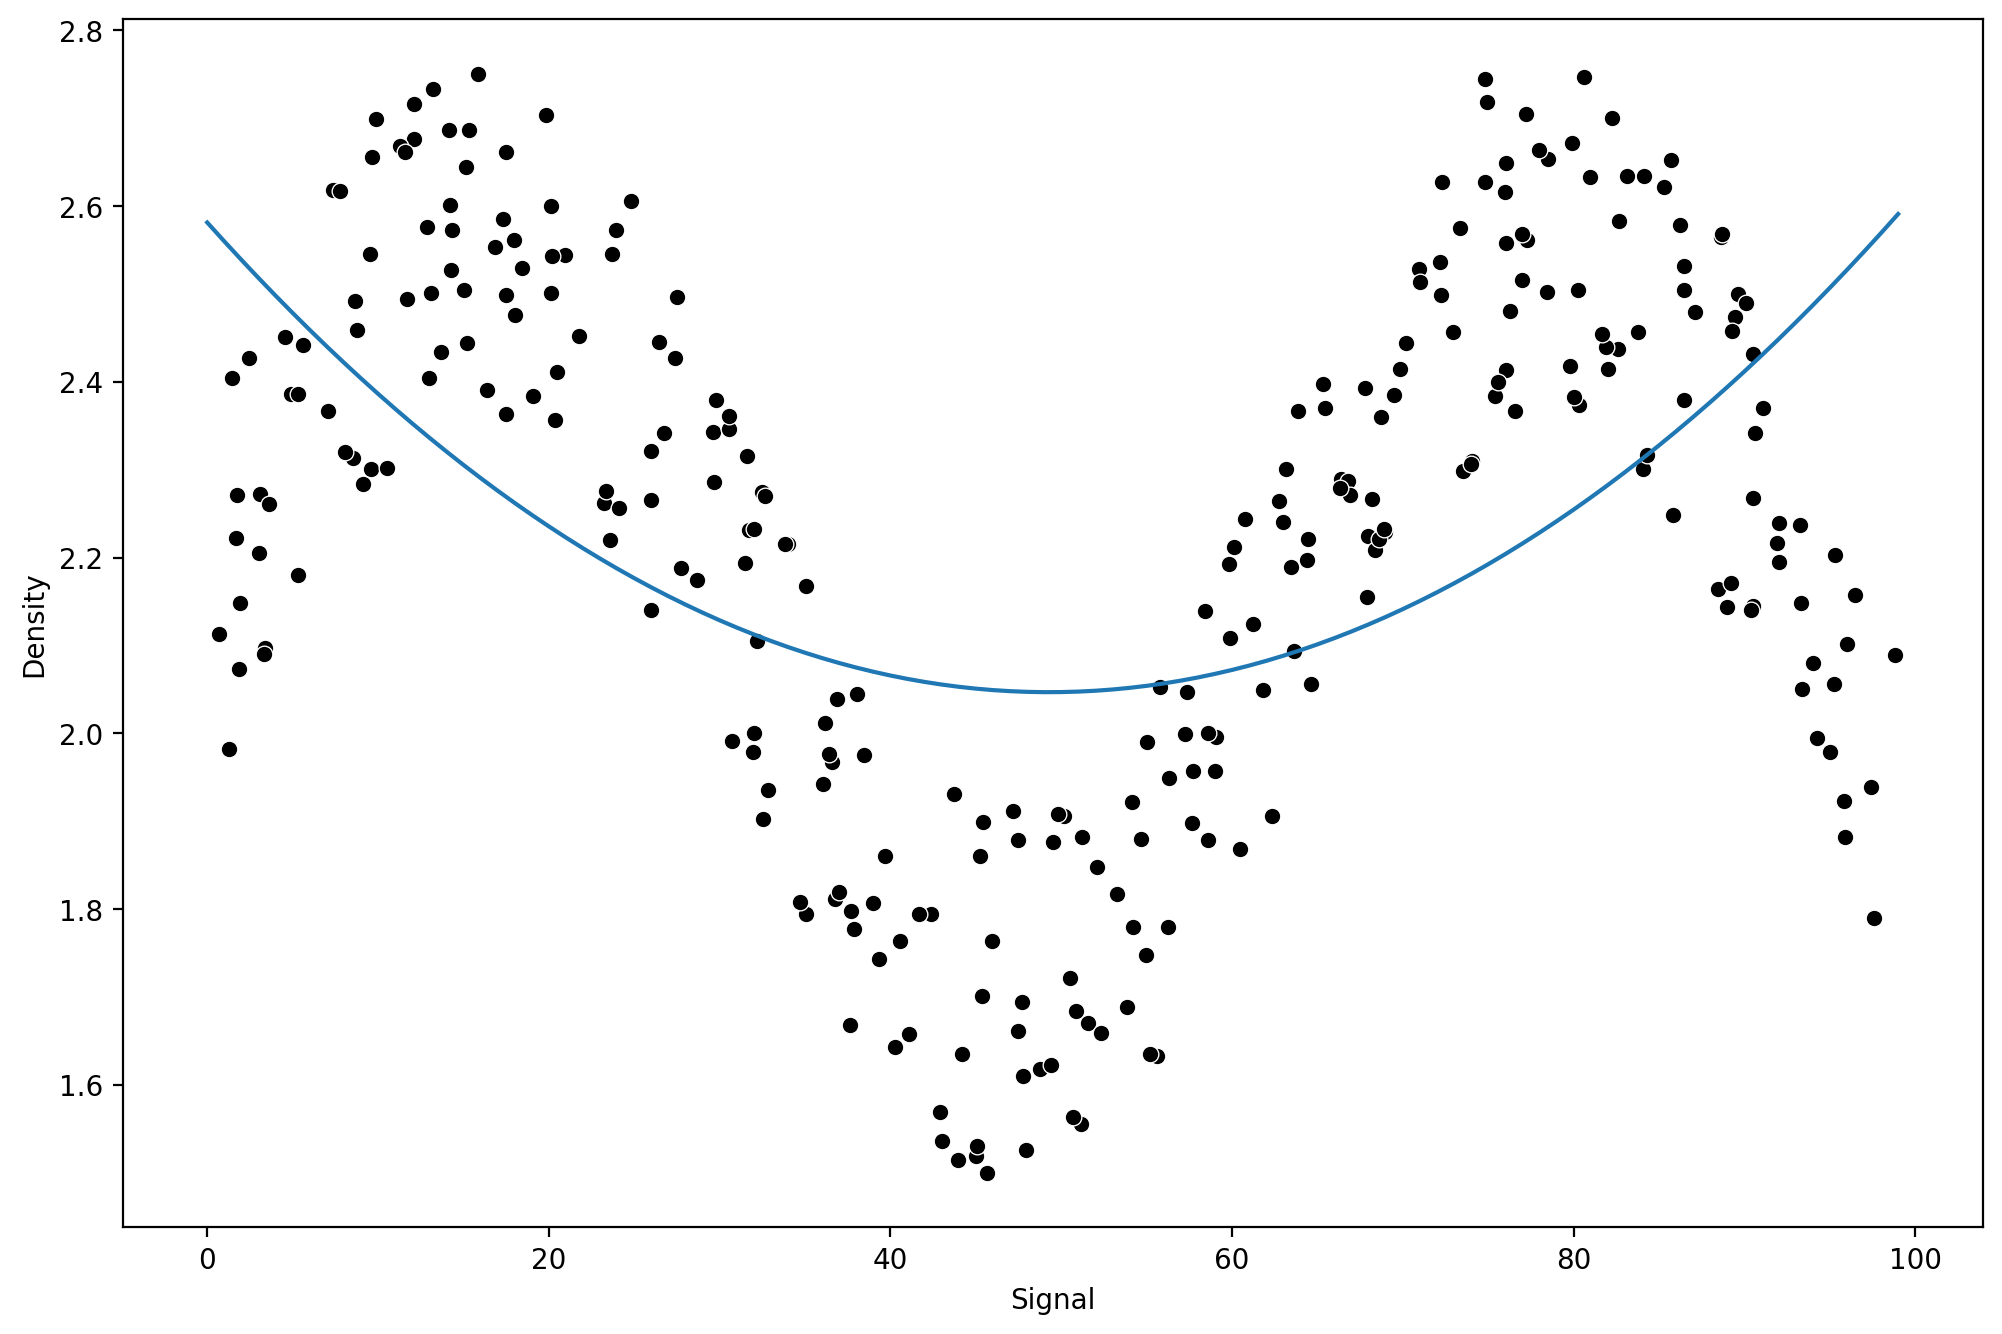

In [61]:
run_model(pipe, X_train, X_test, y_train, y_test)

## 3 degree Polynomial

MAE: 0.24211834039531546
RMSE: 0.2879748127918897


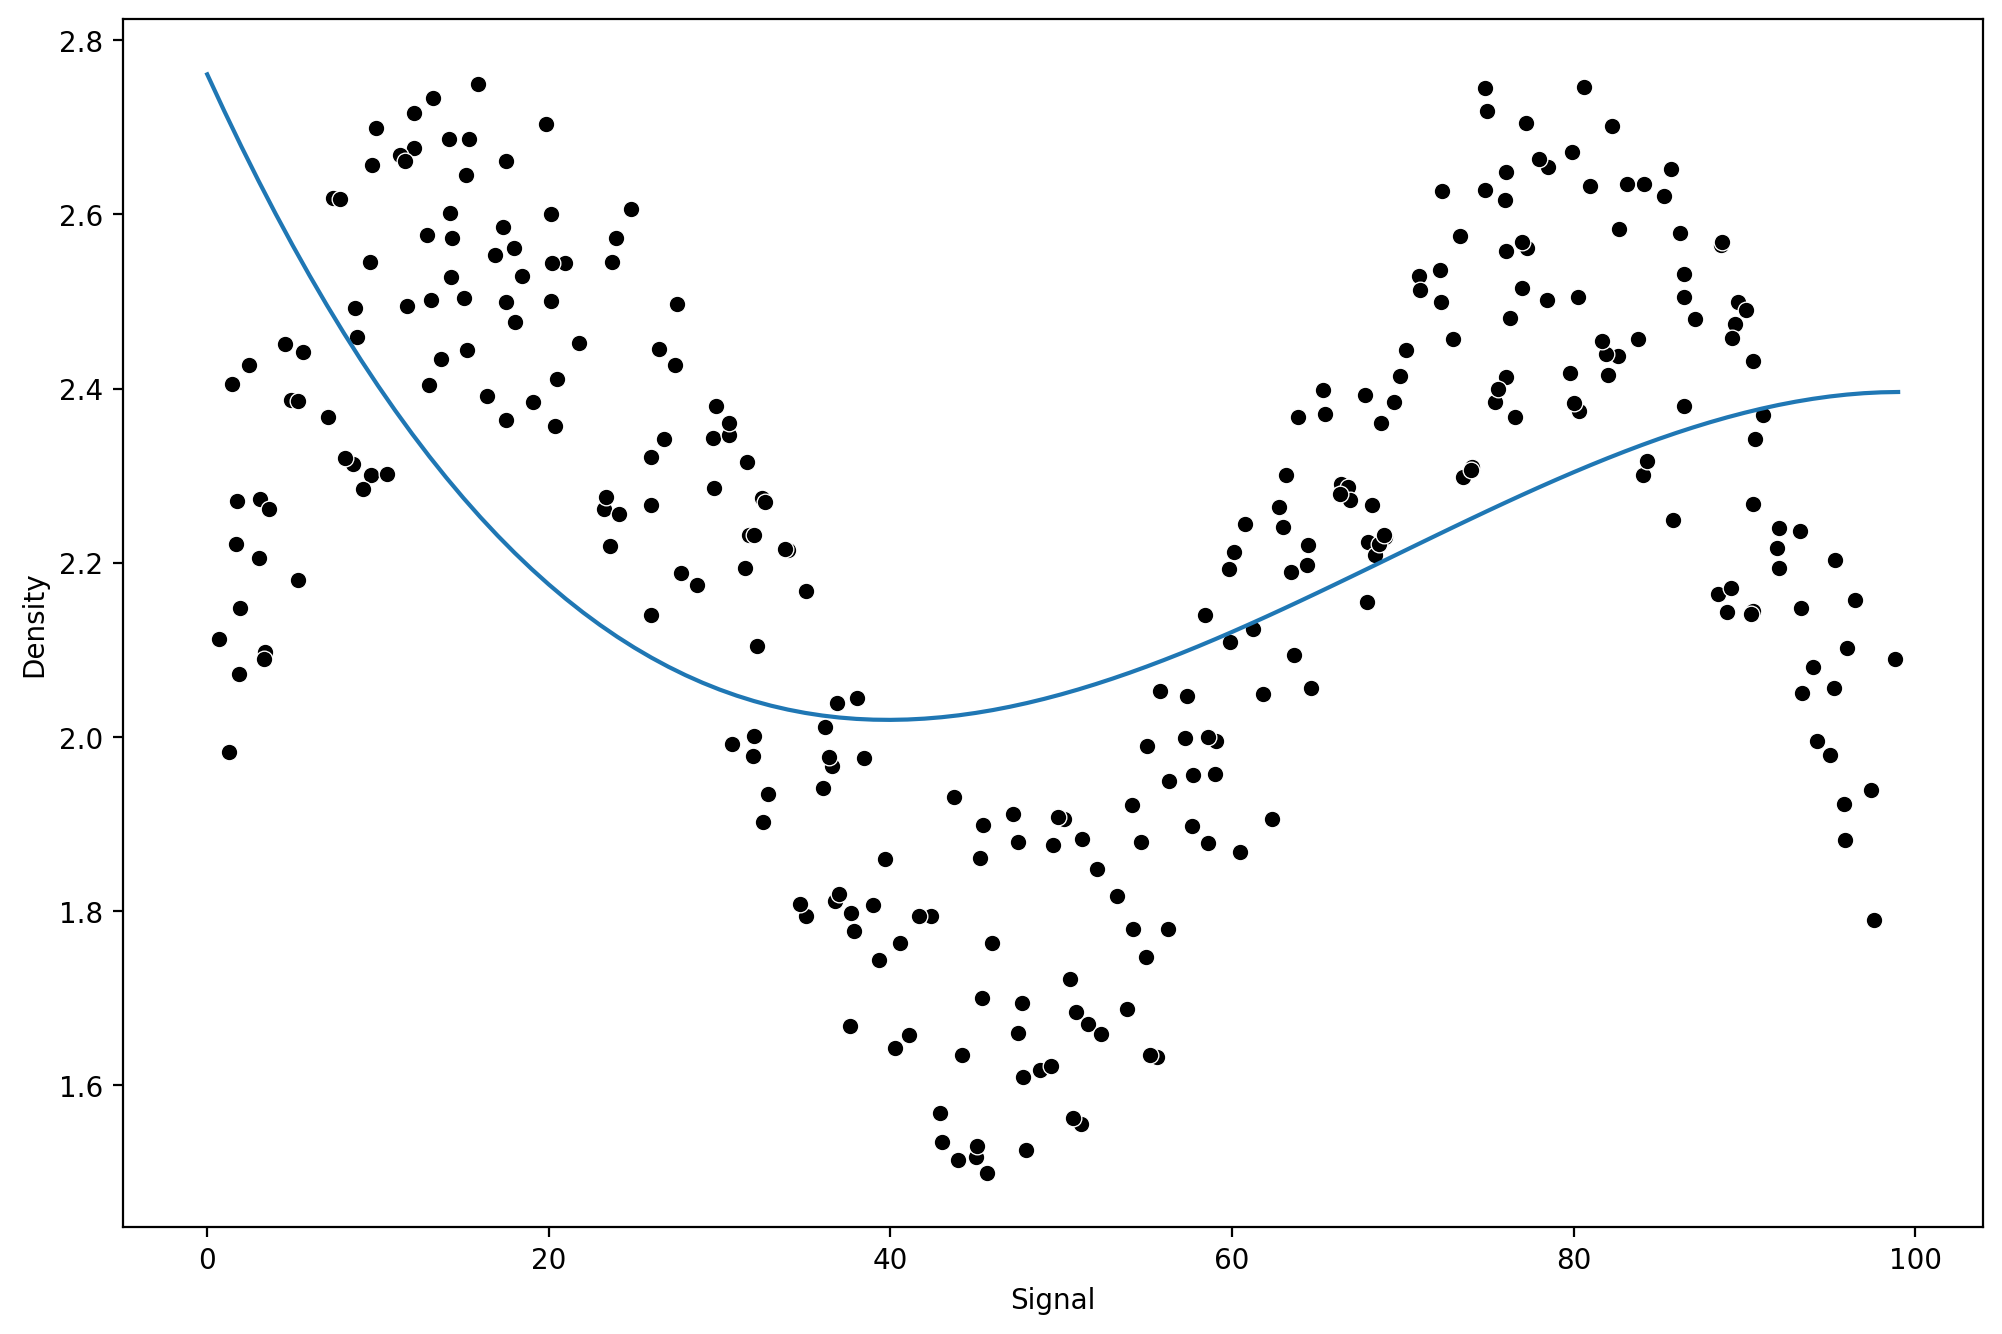

In [63]:
pipe = make_pipeline(PolynomialFeatures(degree=3), LinearRegression()) # make piepline with 2nd degree polynomail model using linear regression
run_model(pipe, X_train, X_test, y_train, y_test)

## 6 degree Polynomial

MAE: 0.11969180247549532
RMSE: 0.1380752599632154


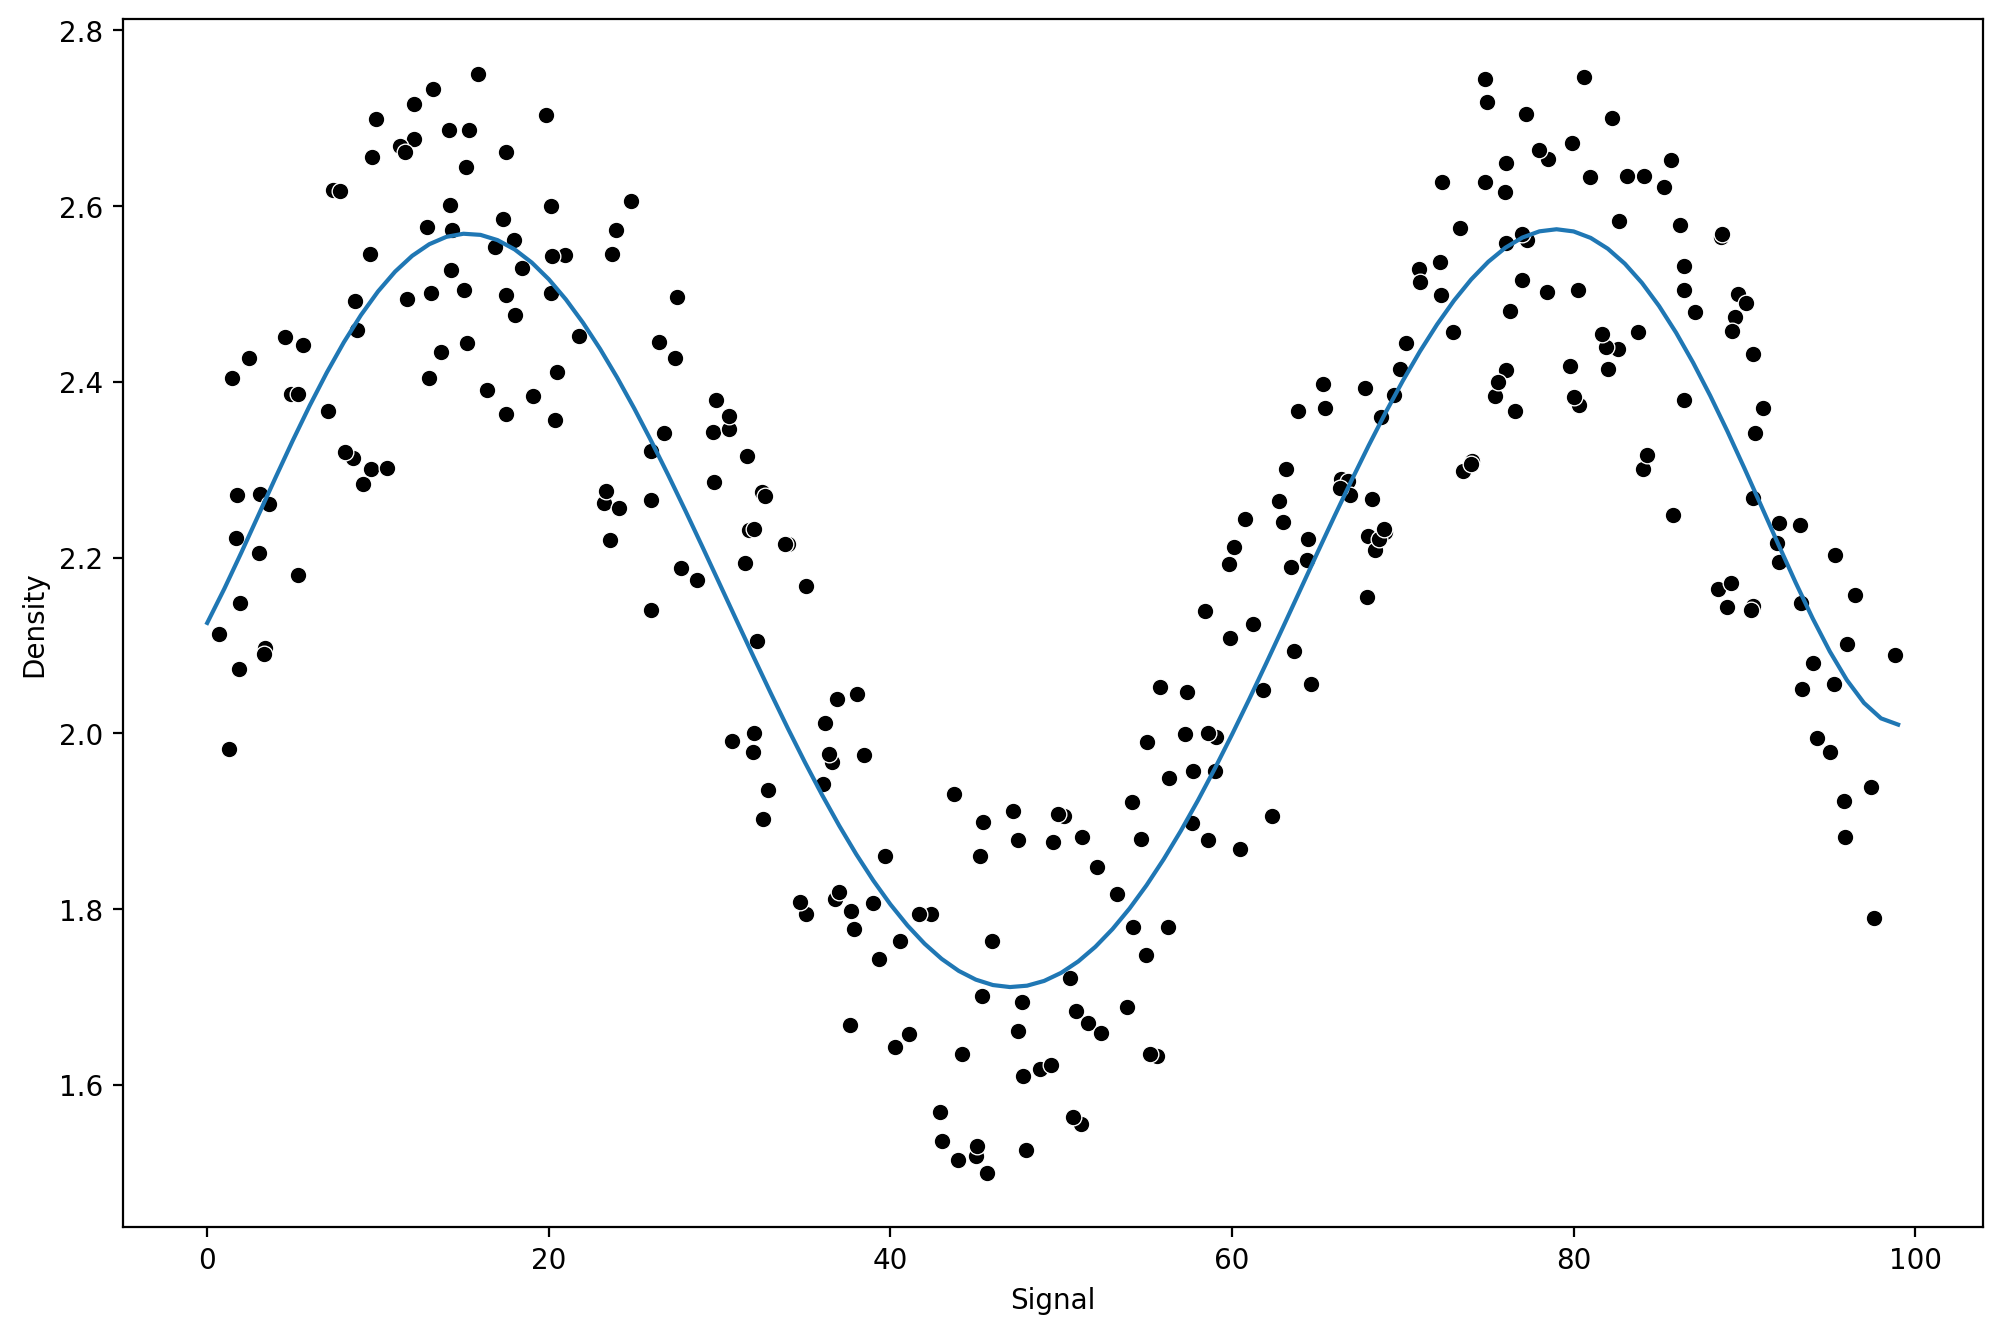

In [62]:
pipe = make_pipeline(PolynomialFeatures(degree=6), LinearRegression()) # make piepline with 2nd degree polynomail model using linear regression
run_model(pipe, X_train, X_test, y_train, y_test)

## 10 degree Polynomial


MAE: 0.1257857064413144
RMSE: 0.14193029601224638


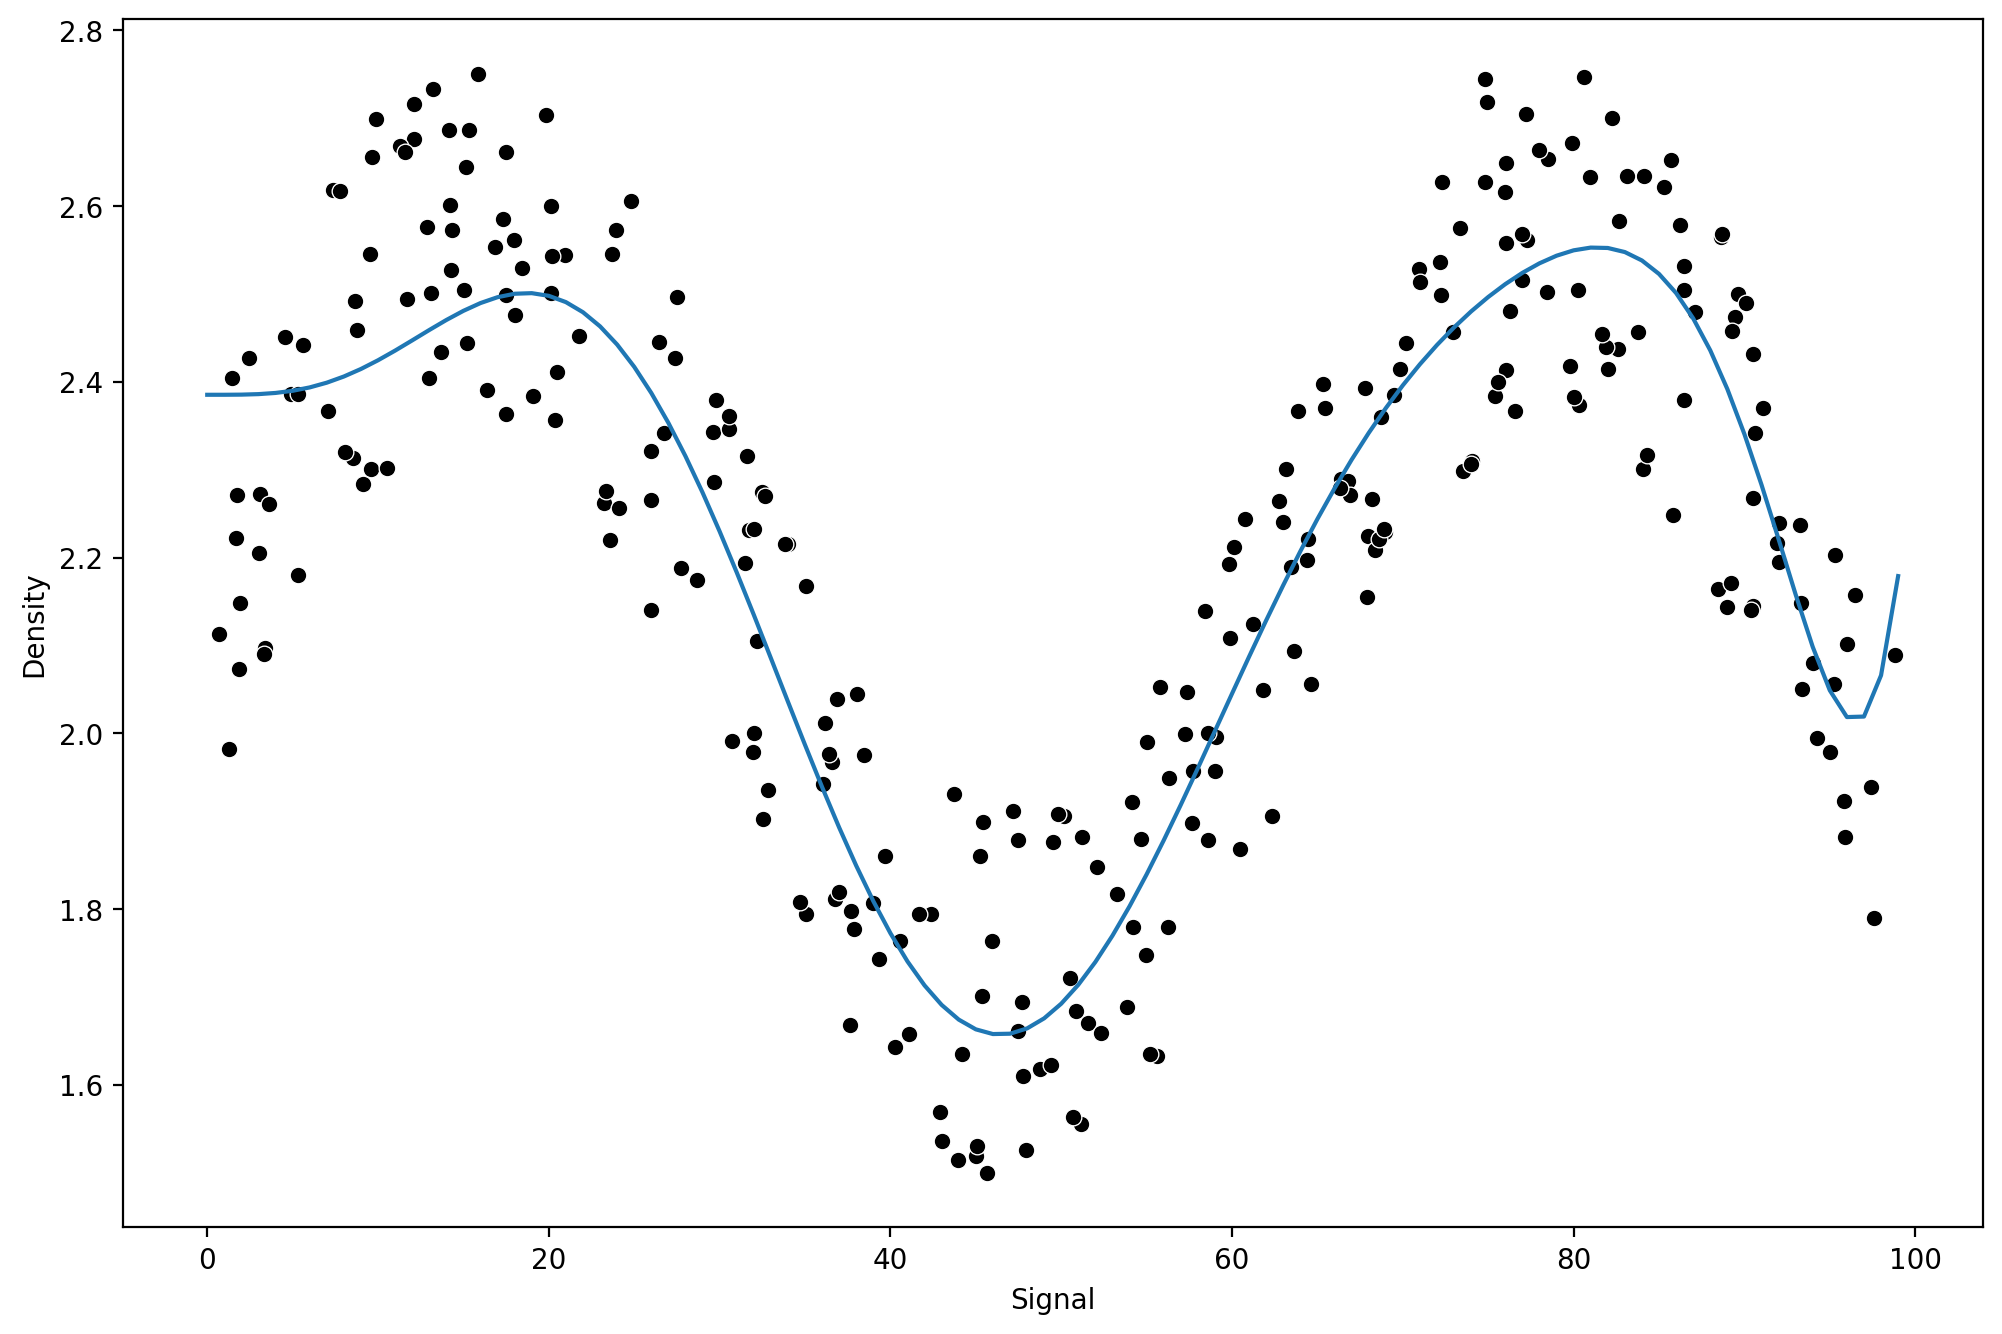

In [64]:
pipe = make_pipeline(PolynomialFeatures(degree=10), LinearRegression()) # make piepline with 2nd degree polynomail model using linear regression
run_model(pipe, X_train, X_test, y_train, y_test)

If we know that our `Signal` is always between 0 and 100, then we can be satisfied with degree `6`.

But what if we want to expand Signal range beyond 100? And we don't have any data points for that. And we don't know what to expect and how it is going to fit.

That's when we need to check more robust model (Advanced following Models)

------

# Advanced Models

# <a name='knn'>3) KNN Regression</a>

In [65]:
from sklearn.neighbors import KNeighborsRegressor

MAE: 0.11877297474442382
RMSE: 0.15234870286353372
MAE: 0.12198383614100564
RMSE: 0.13730685016923655
MAE: 0.11635971693292672
RMSE: 0.13277855732740926
MAE: 0.13363165935705315
RMSE: 0.15954234753677107


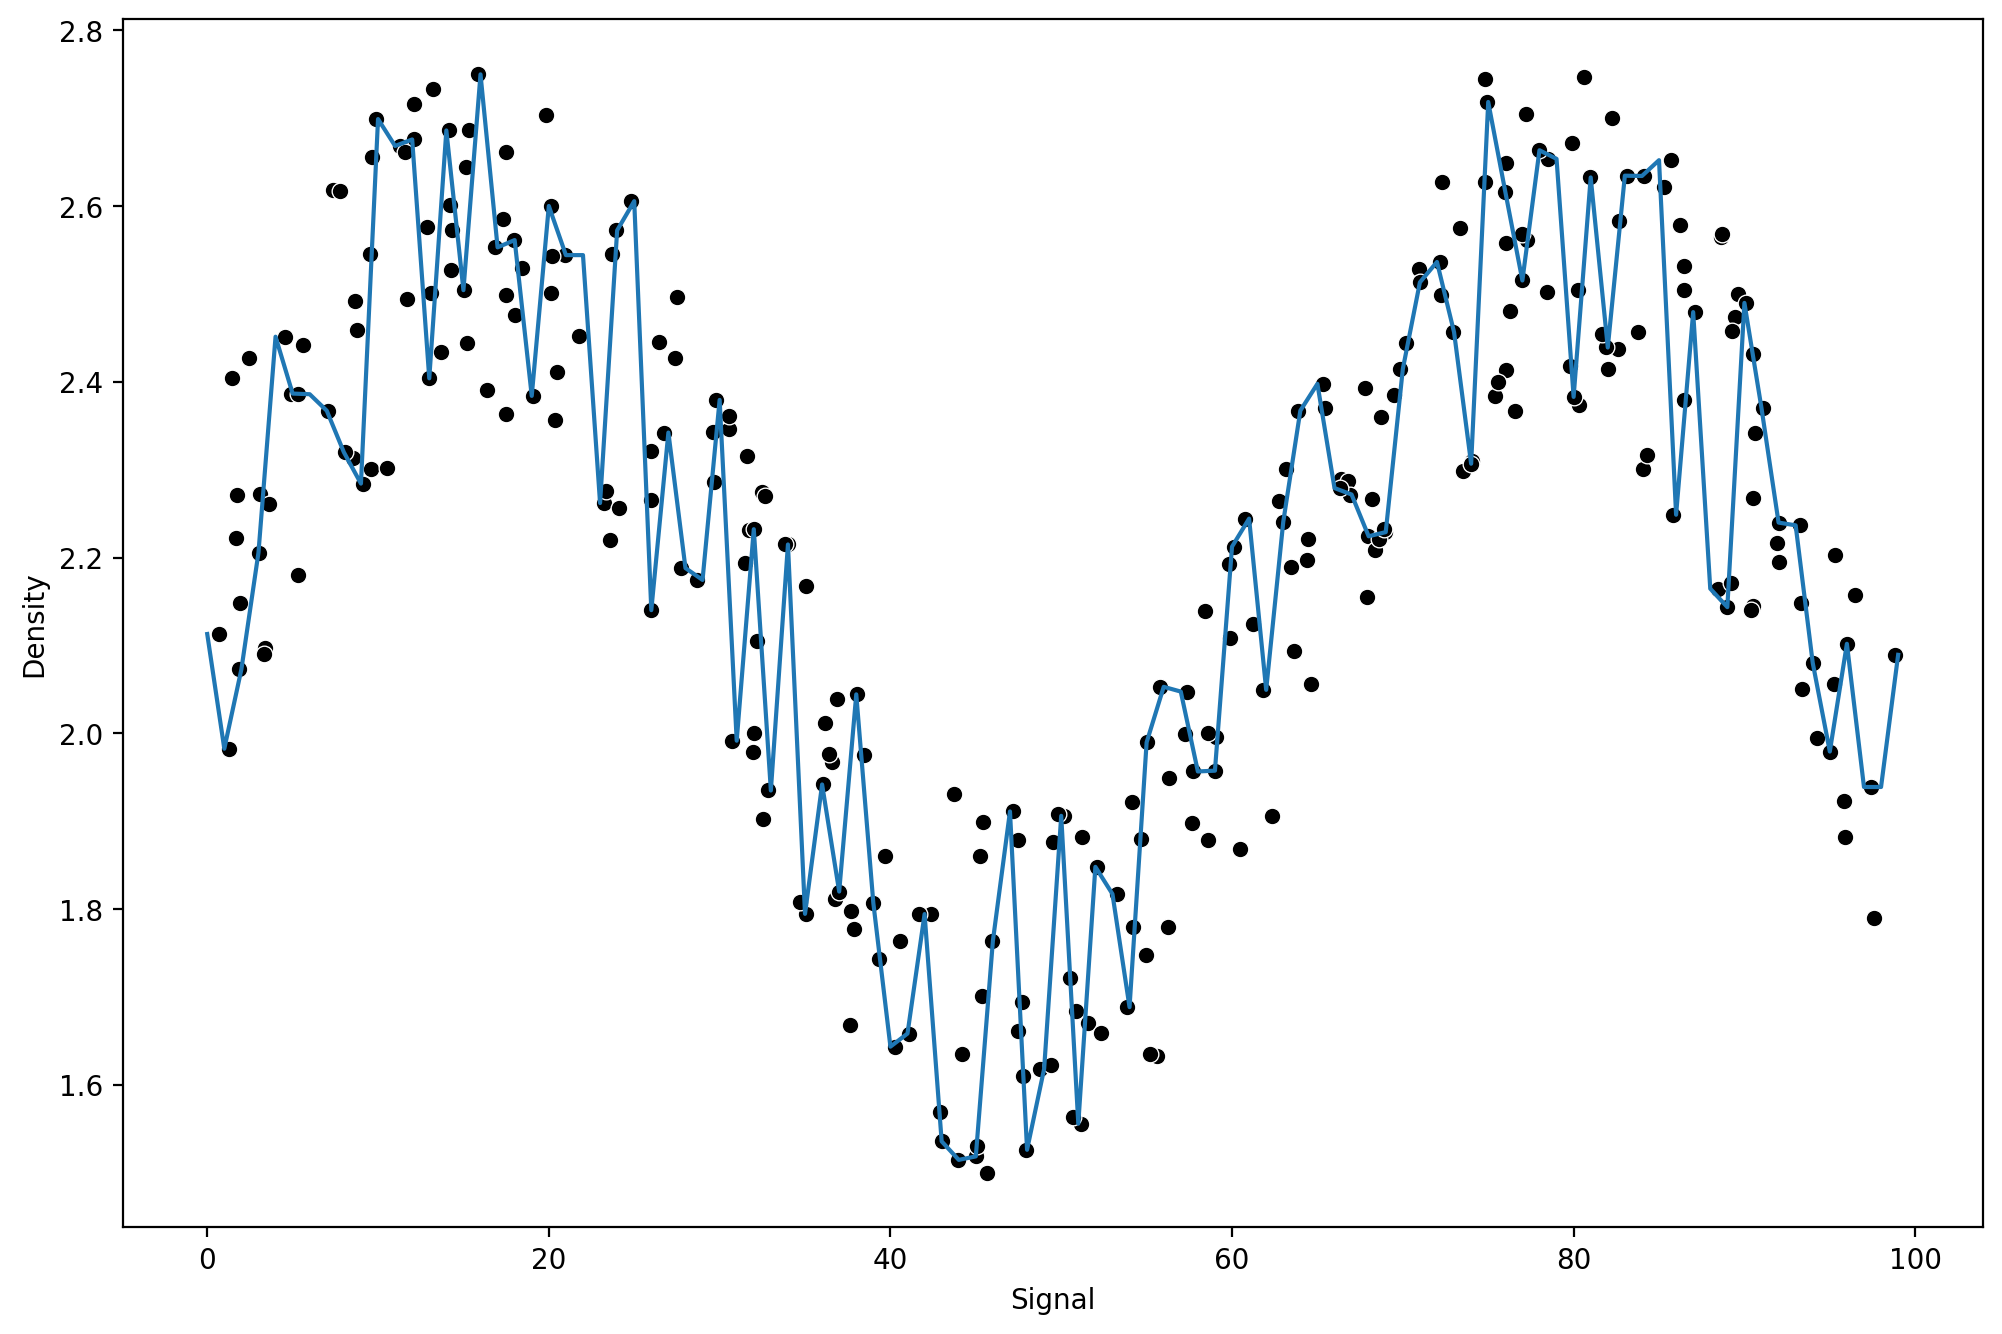

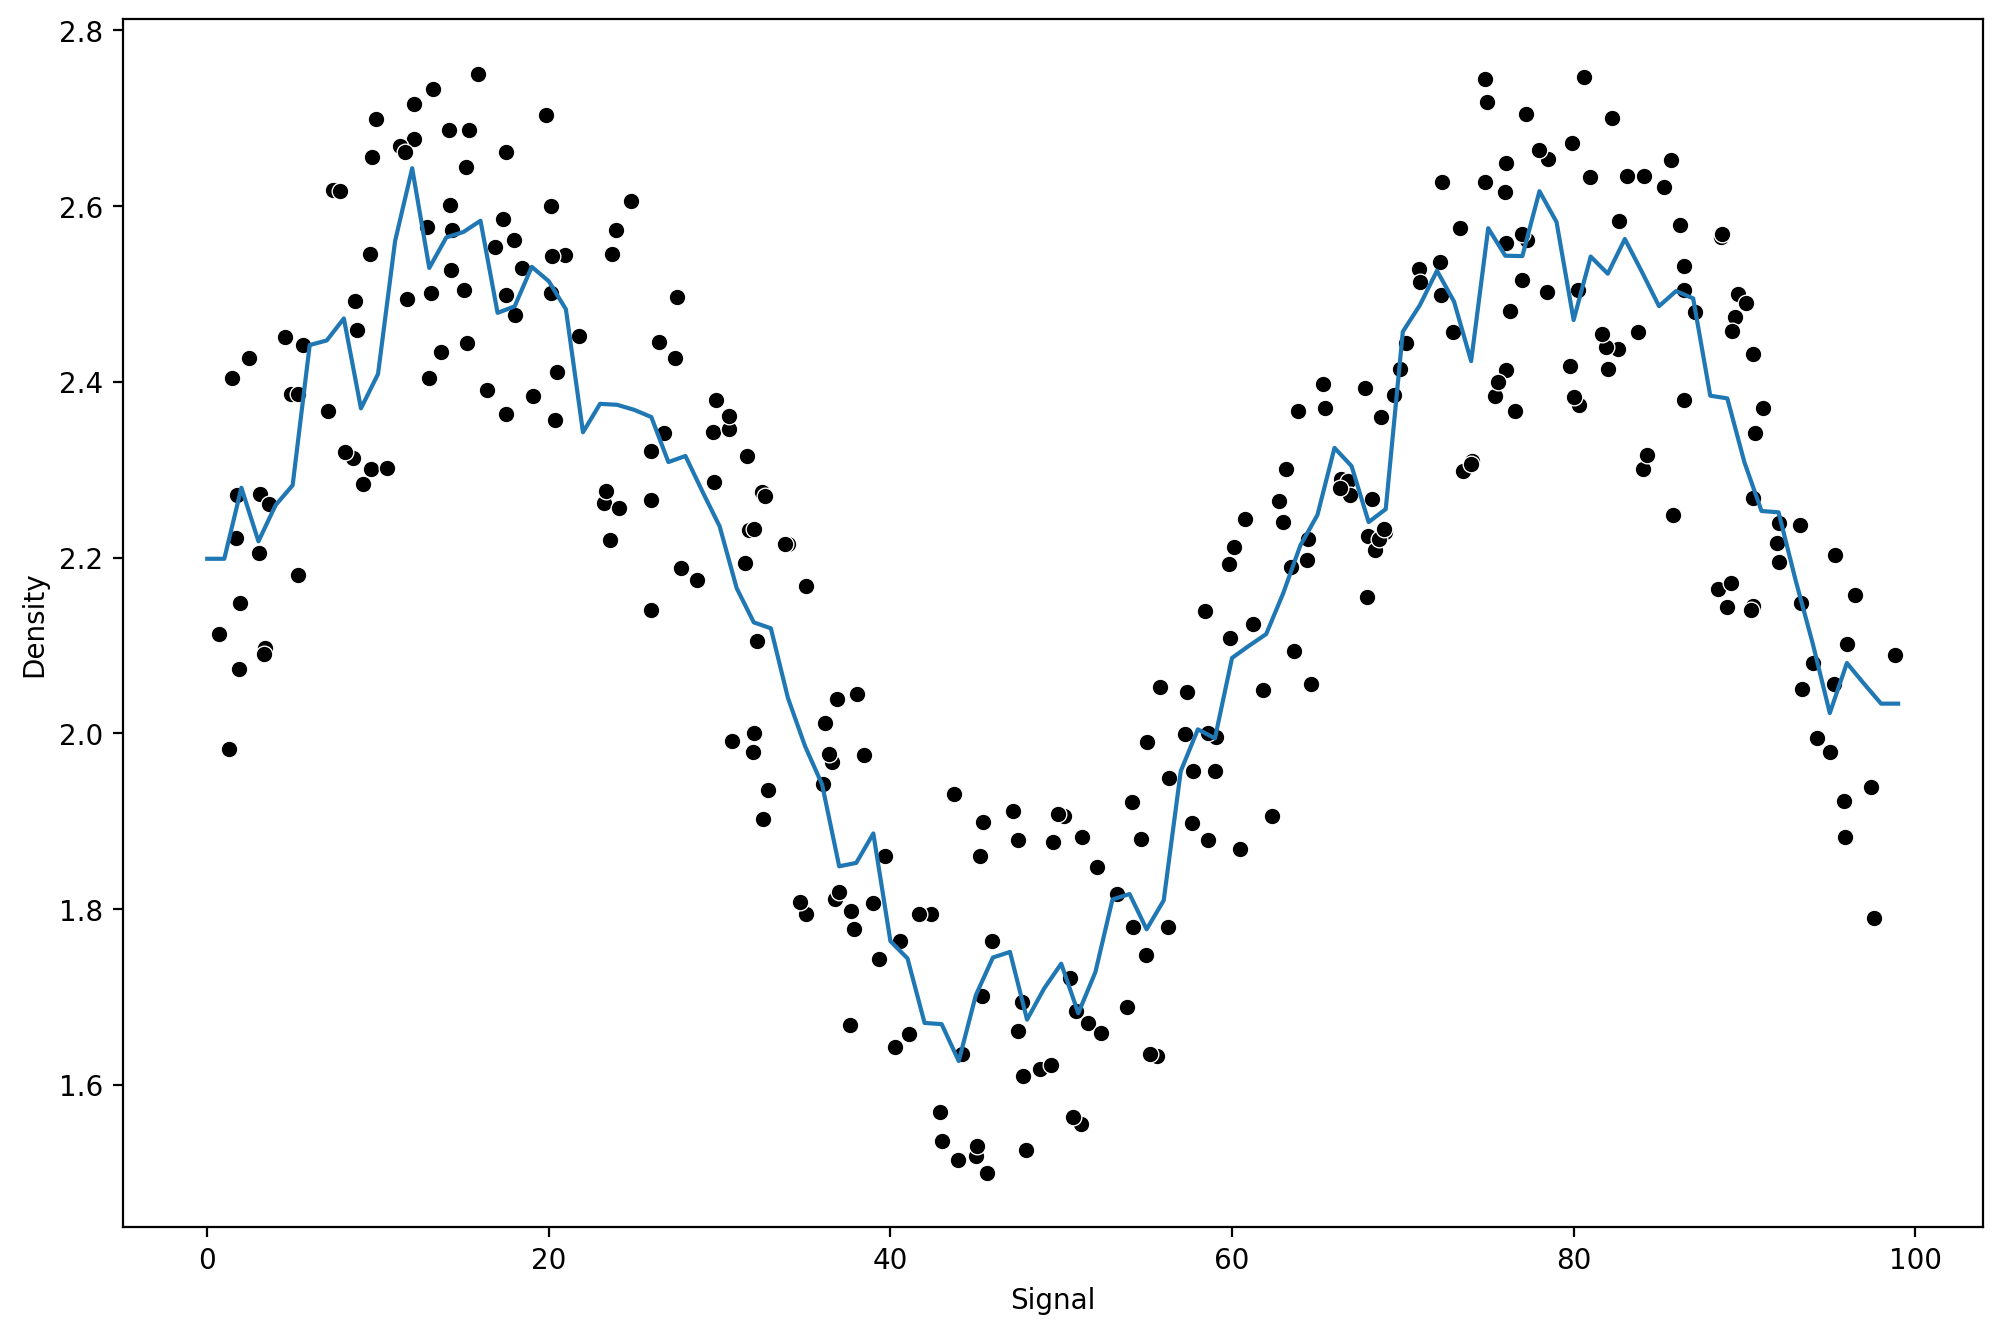

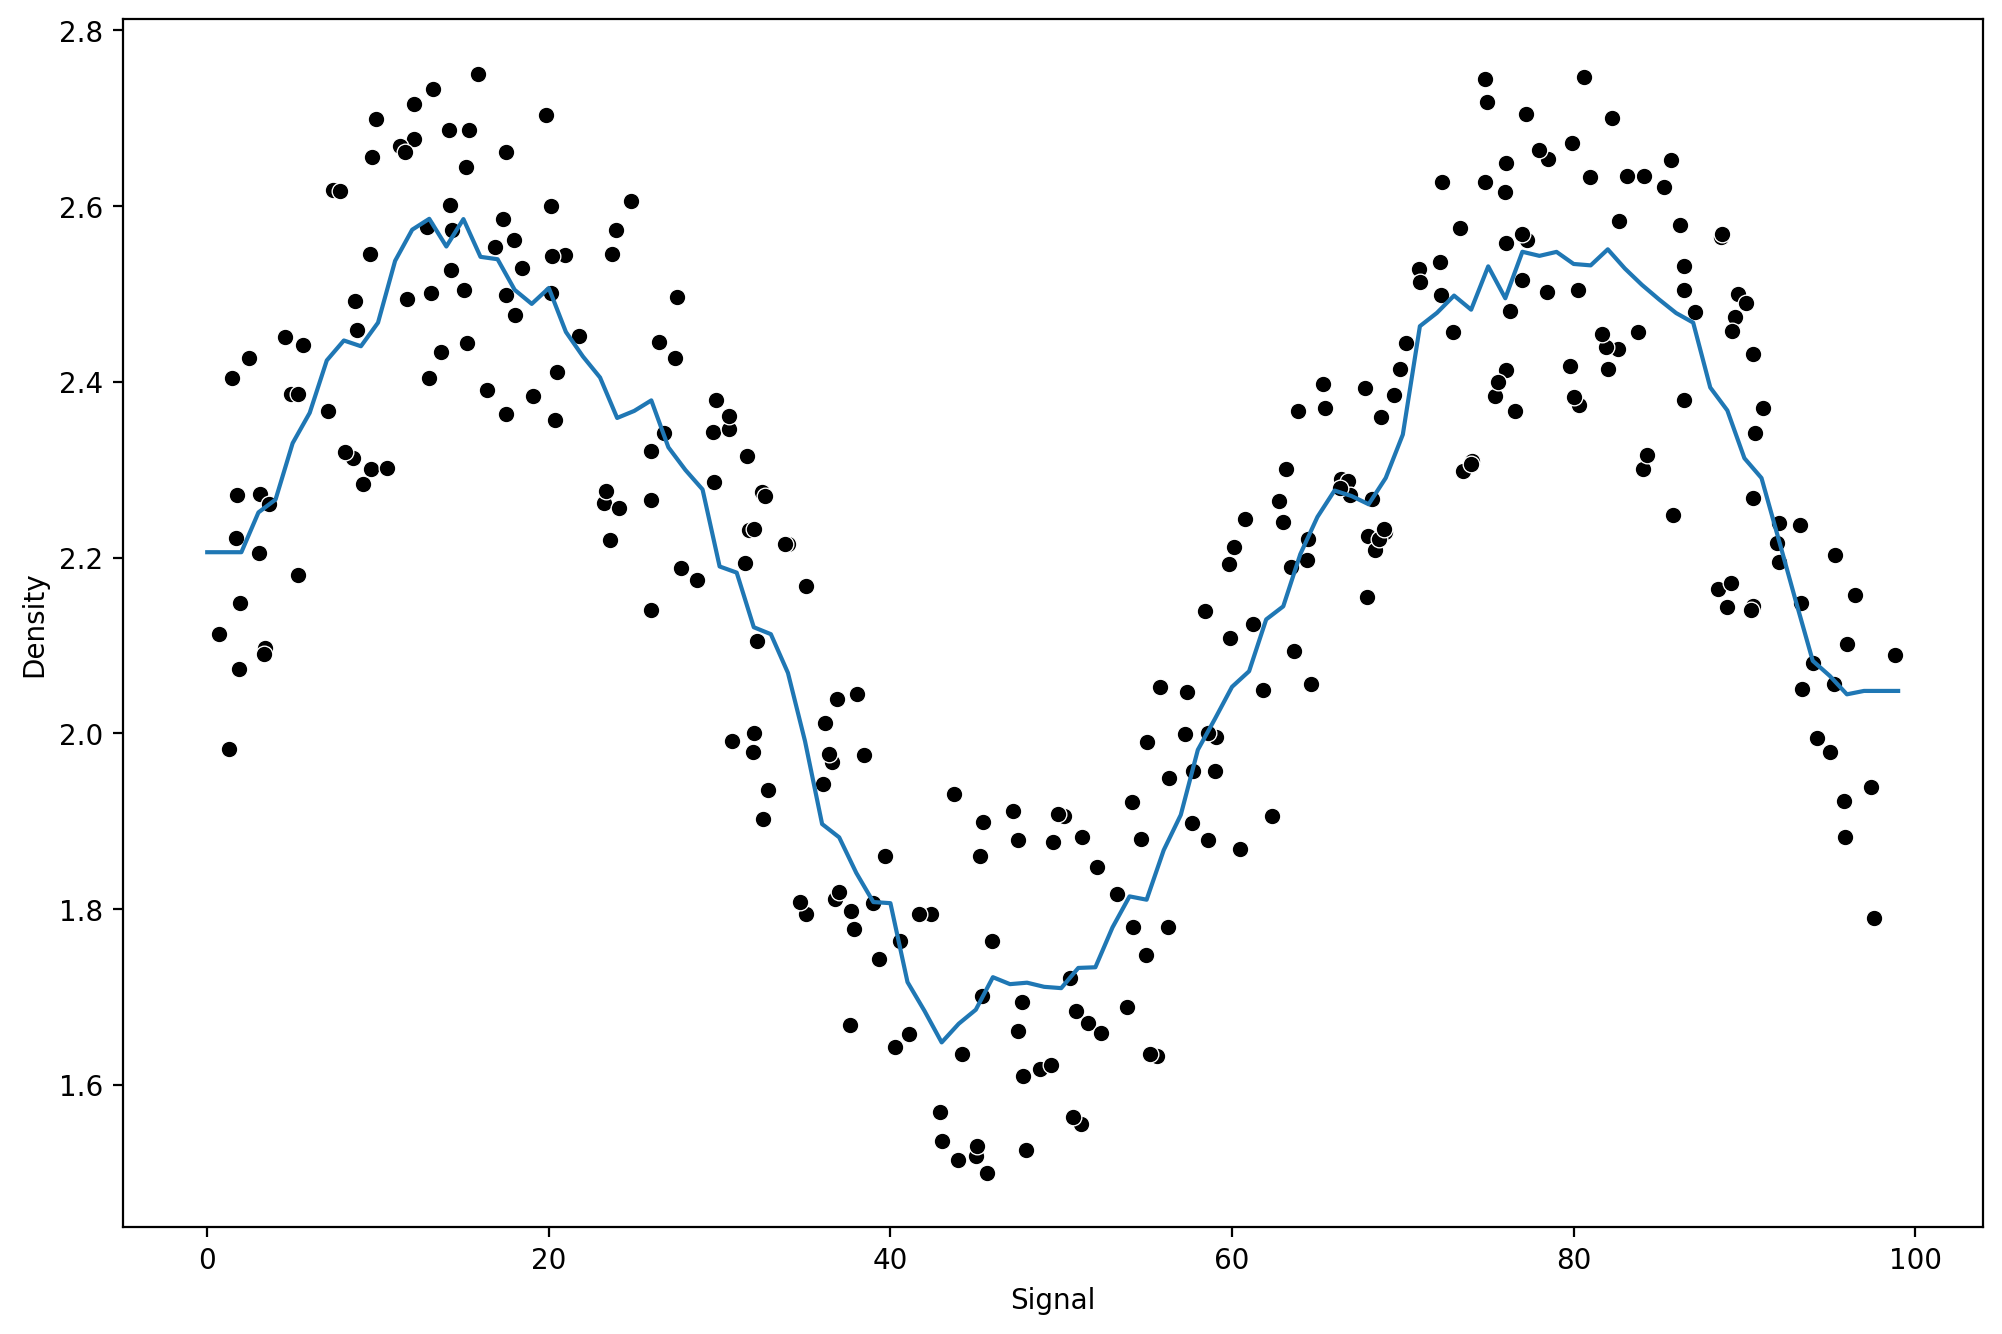

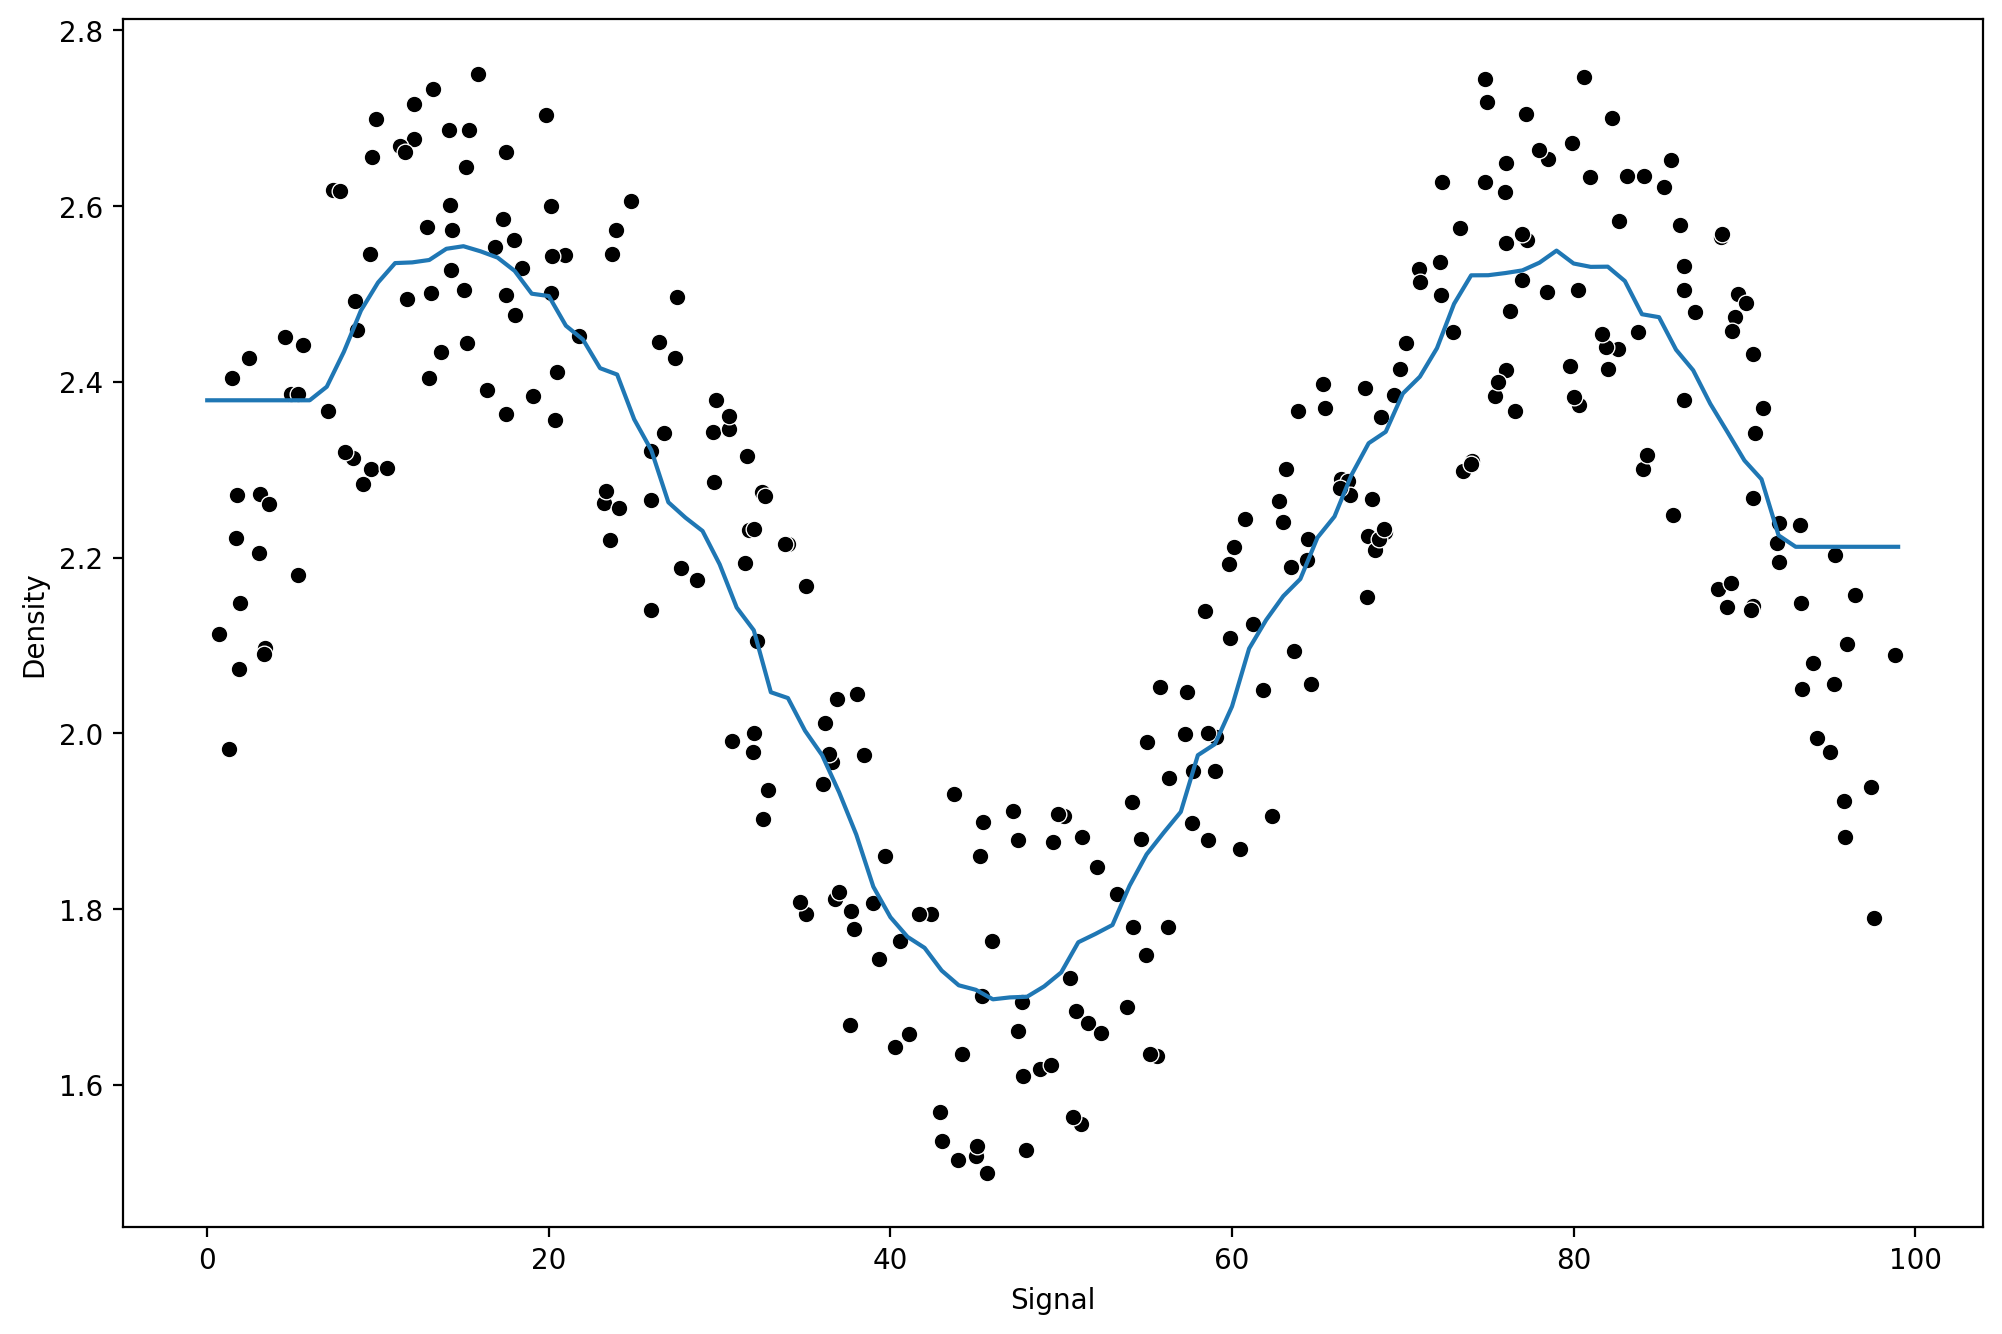

In [69]:
k_values = [1, 5, 10, 30]

for n in k_values:
    model = KNeighborsRegressor(n_neighbors=n)
    run_model(model, X_train, X_test, y_train, y_test)

As we can see the in the first model, there are a a lof of nosies (variances), seem like over fitting.

In the second model, the line is much more smoother introducing more bias with less varaiances.

In the fourth model, thare is too much bias and the line start to get flat at the beginning and end. 

So our best choice is reasonable thrid model.

----------

# <a name='tree'>4) Decision Tree Regression</a>

In [70]:
from sklearn.tree import DecisionTreeRegressor

MAE: 0.11877297474442382
RMSE: 0.15234870286353372


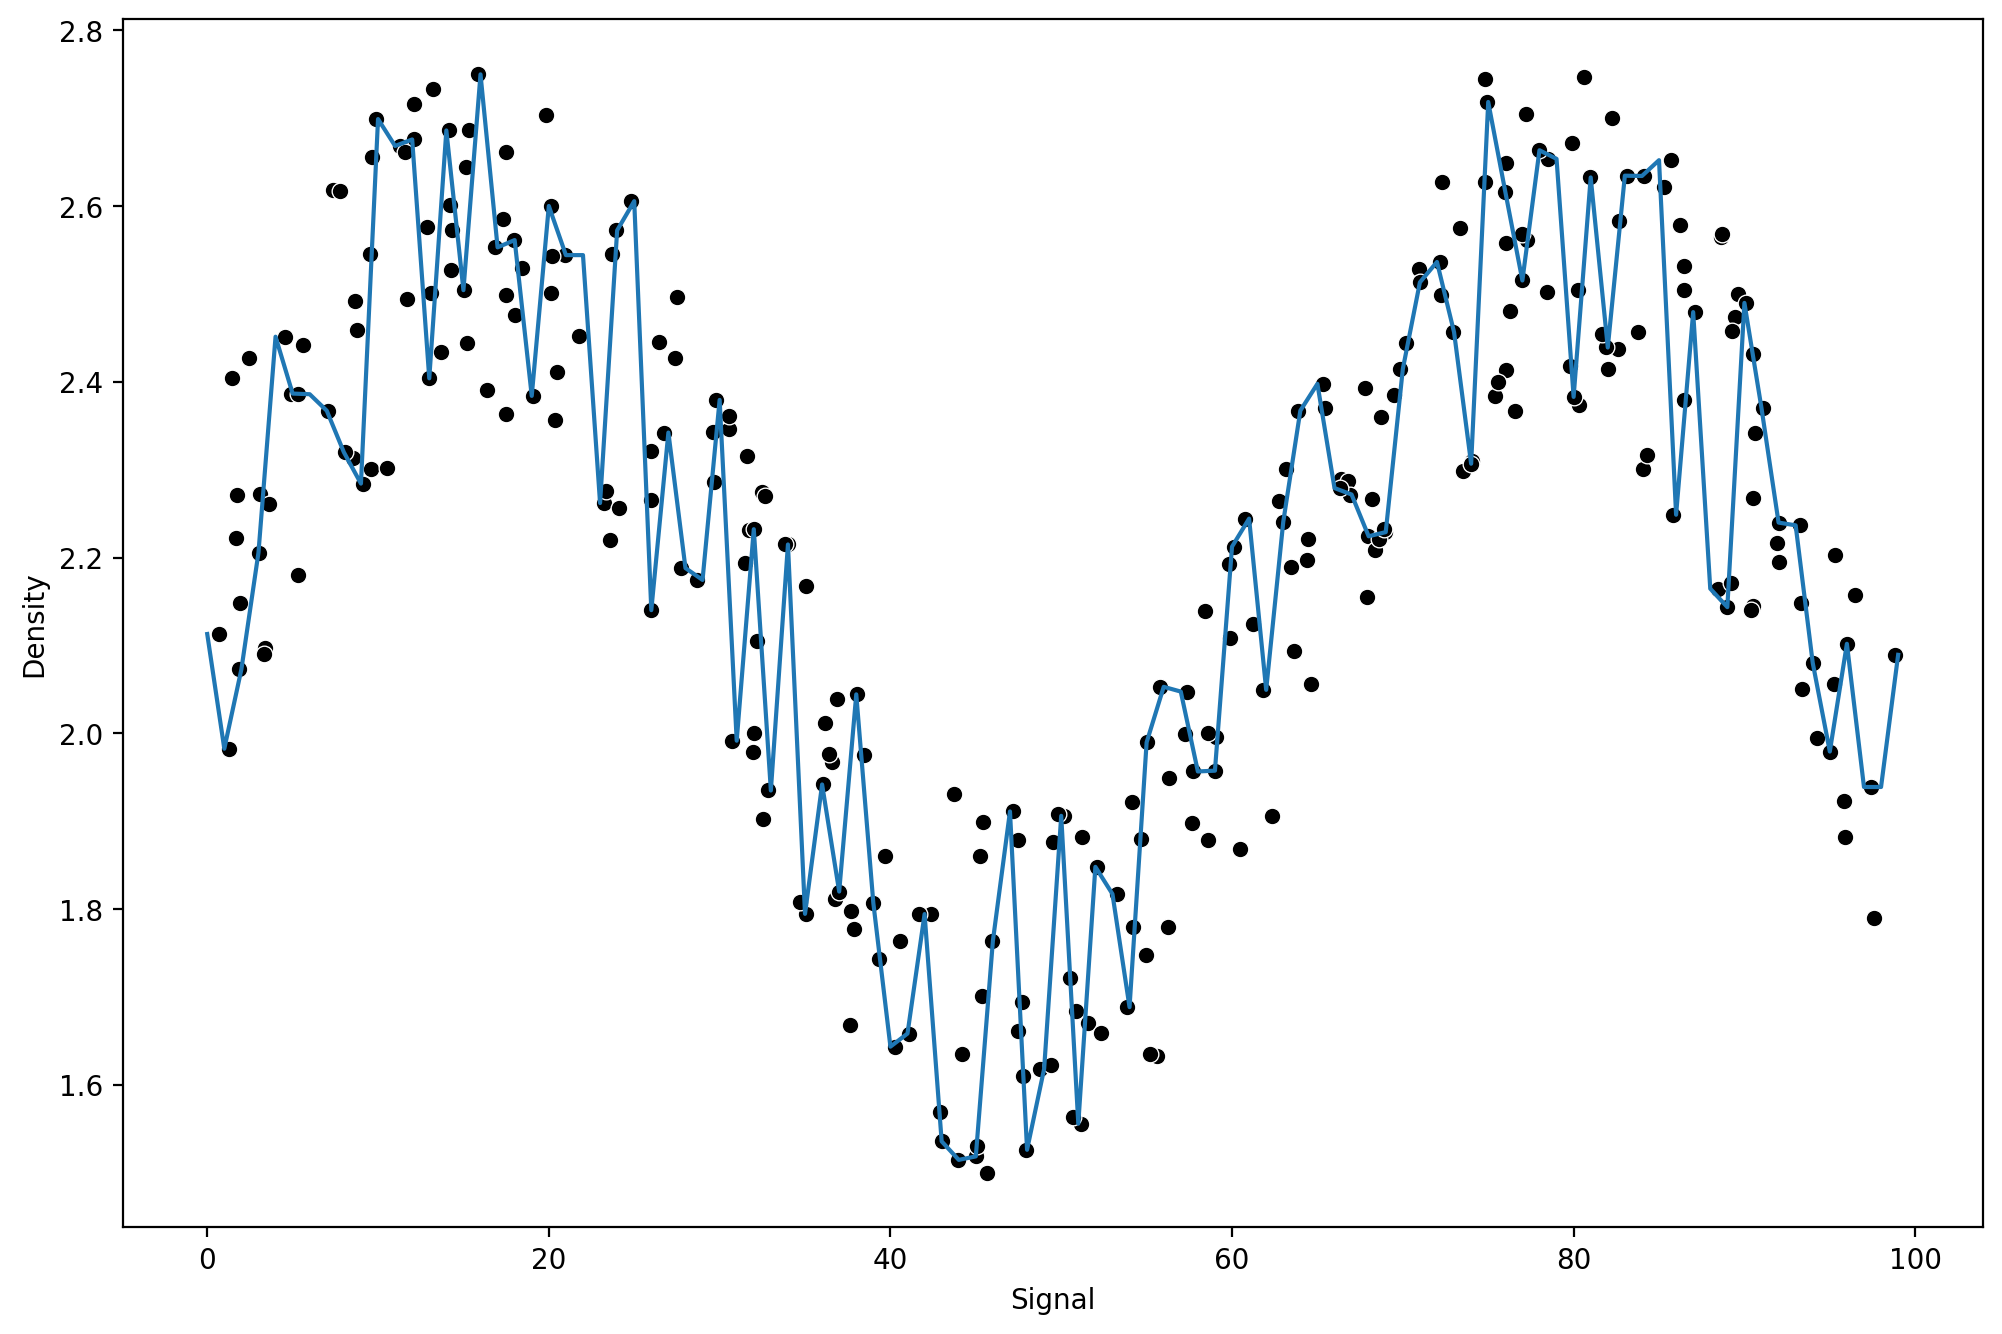

In [72]:
model = DecisionTreeRegressor()
run_model(model, X_train, X_test, y_train, y_test)

------

# <a name='svm'>5) Support Vector Regression</a>

In [73]:
from sklearn.svm import SVR

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
svr = SVR()

param_grid = {
    'C': [0.01, 0.1, 1, 5, 10, 100, 1000],
    'gamma': ['auto', 'scale']
}

grid = GridSearchCV(SVR(), param_grid)

MAE: 0.10839253242165772
RMSE: 0.12634668775105407


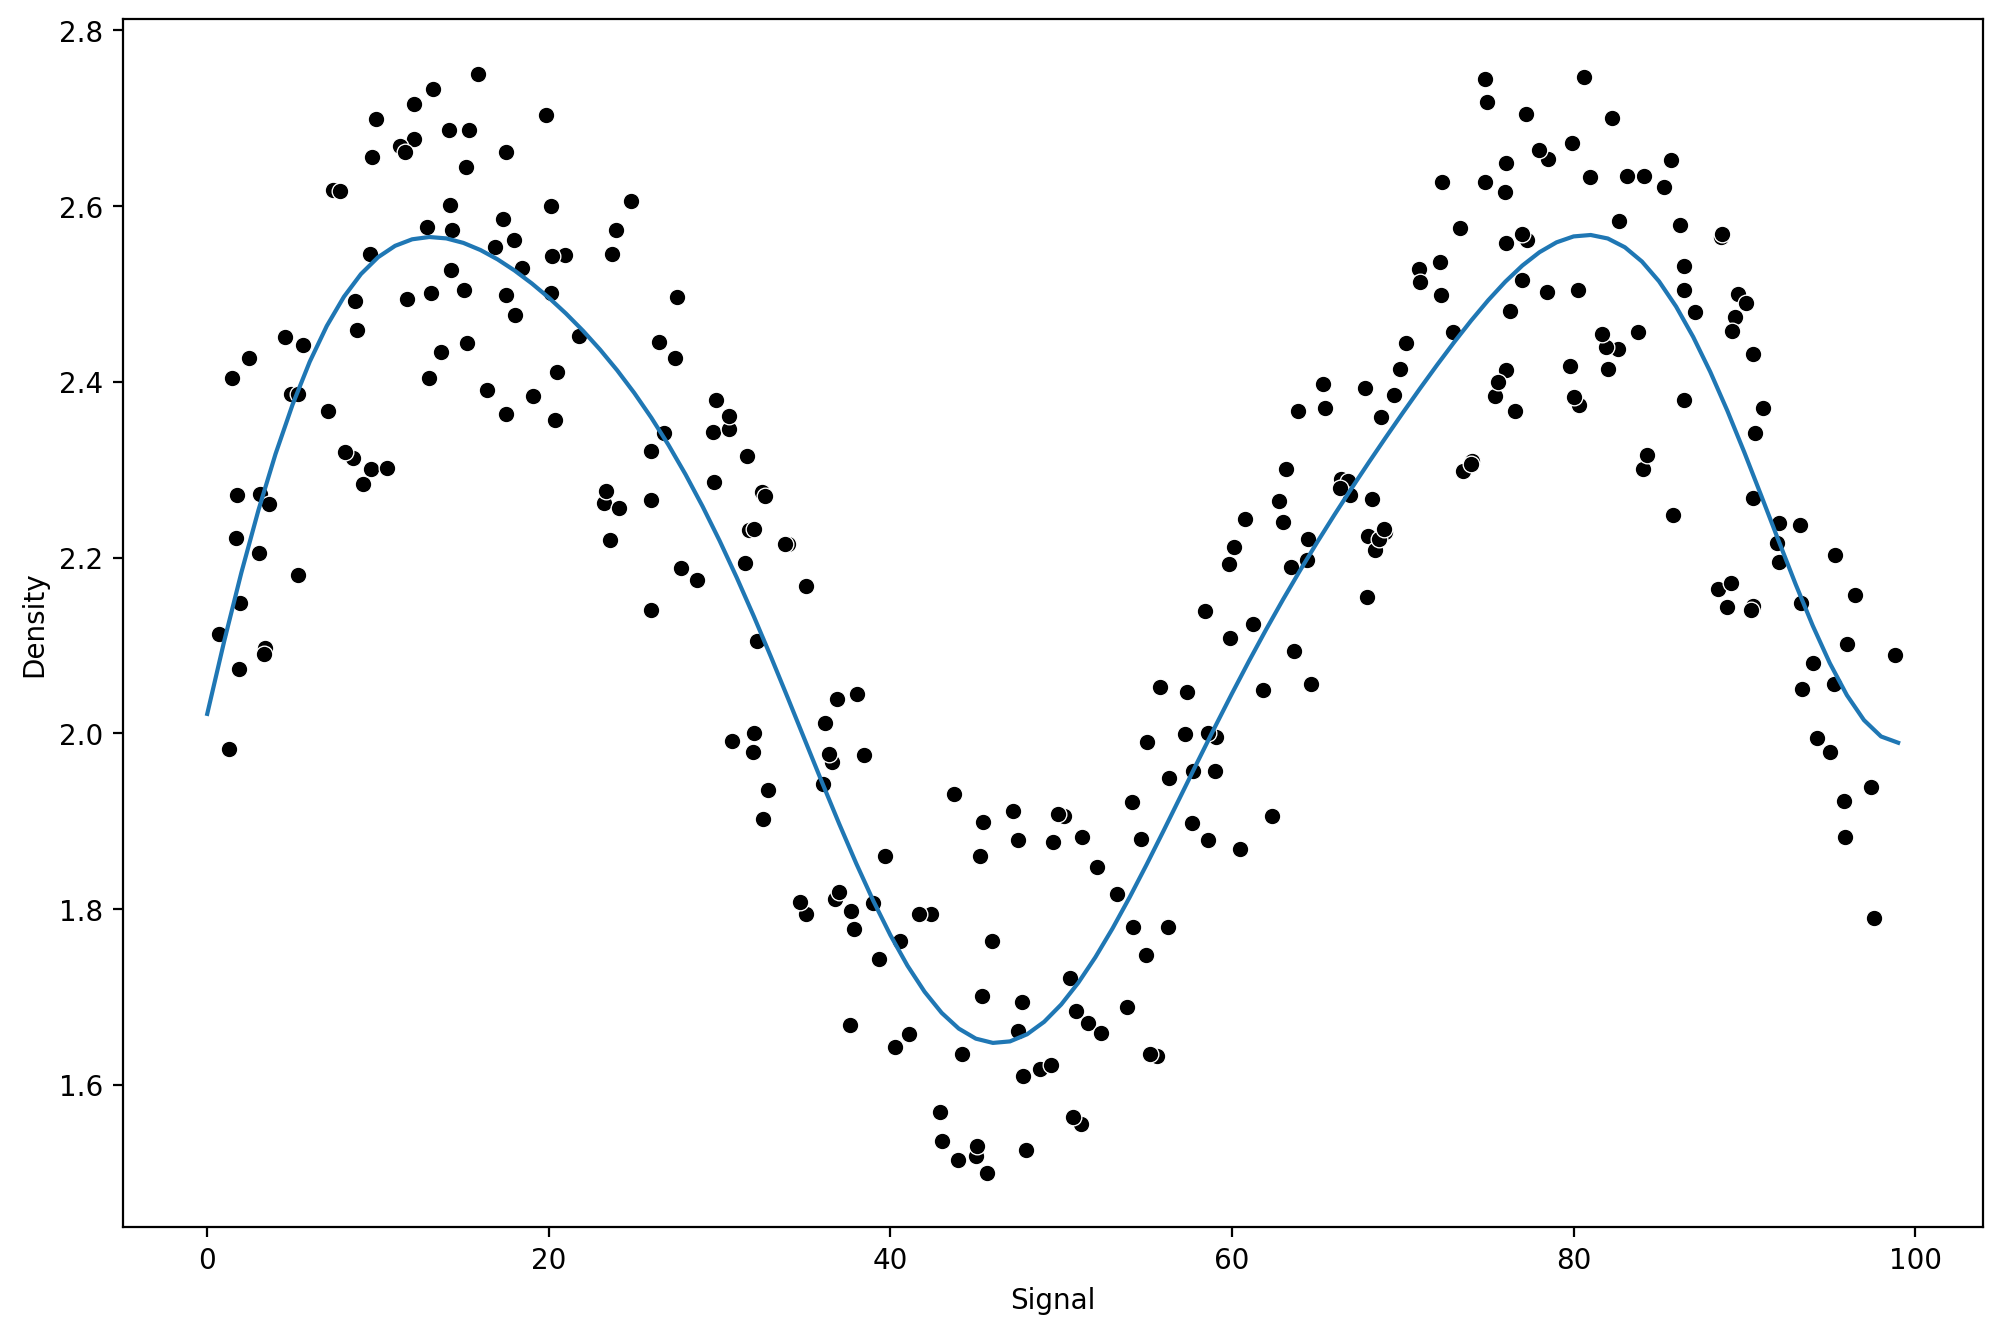

In [85]:
run_model(grid, X_train, X_test, y_train, y_test)

In [80]:
grid.best_params_

{'C': 1000, 'gamma': 'scale'}

-------

# <a name='forest'>6) Random Forest Regression</a>

In [86]:
from sklearn.ensemble import RandomForestRegressor

MAE: 0.10677352529893784
RMSE: 0.1286985793064476


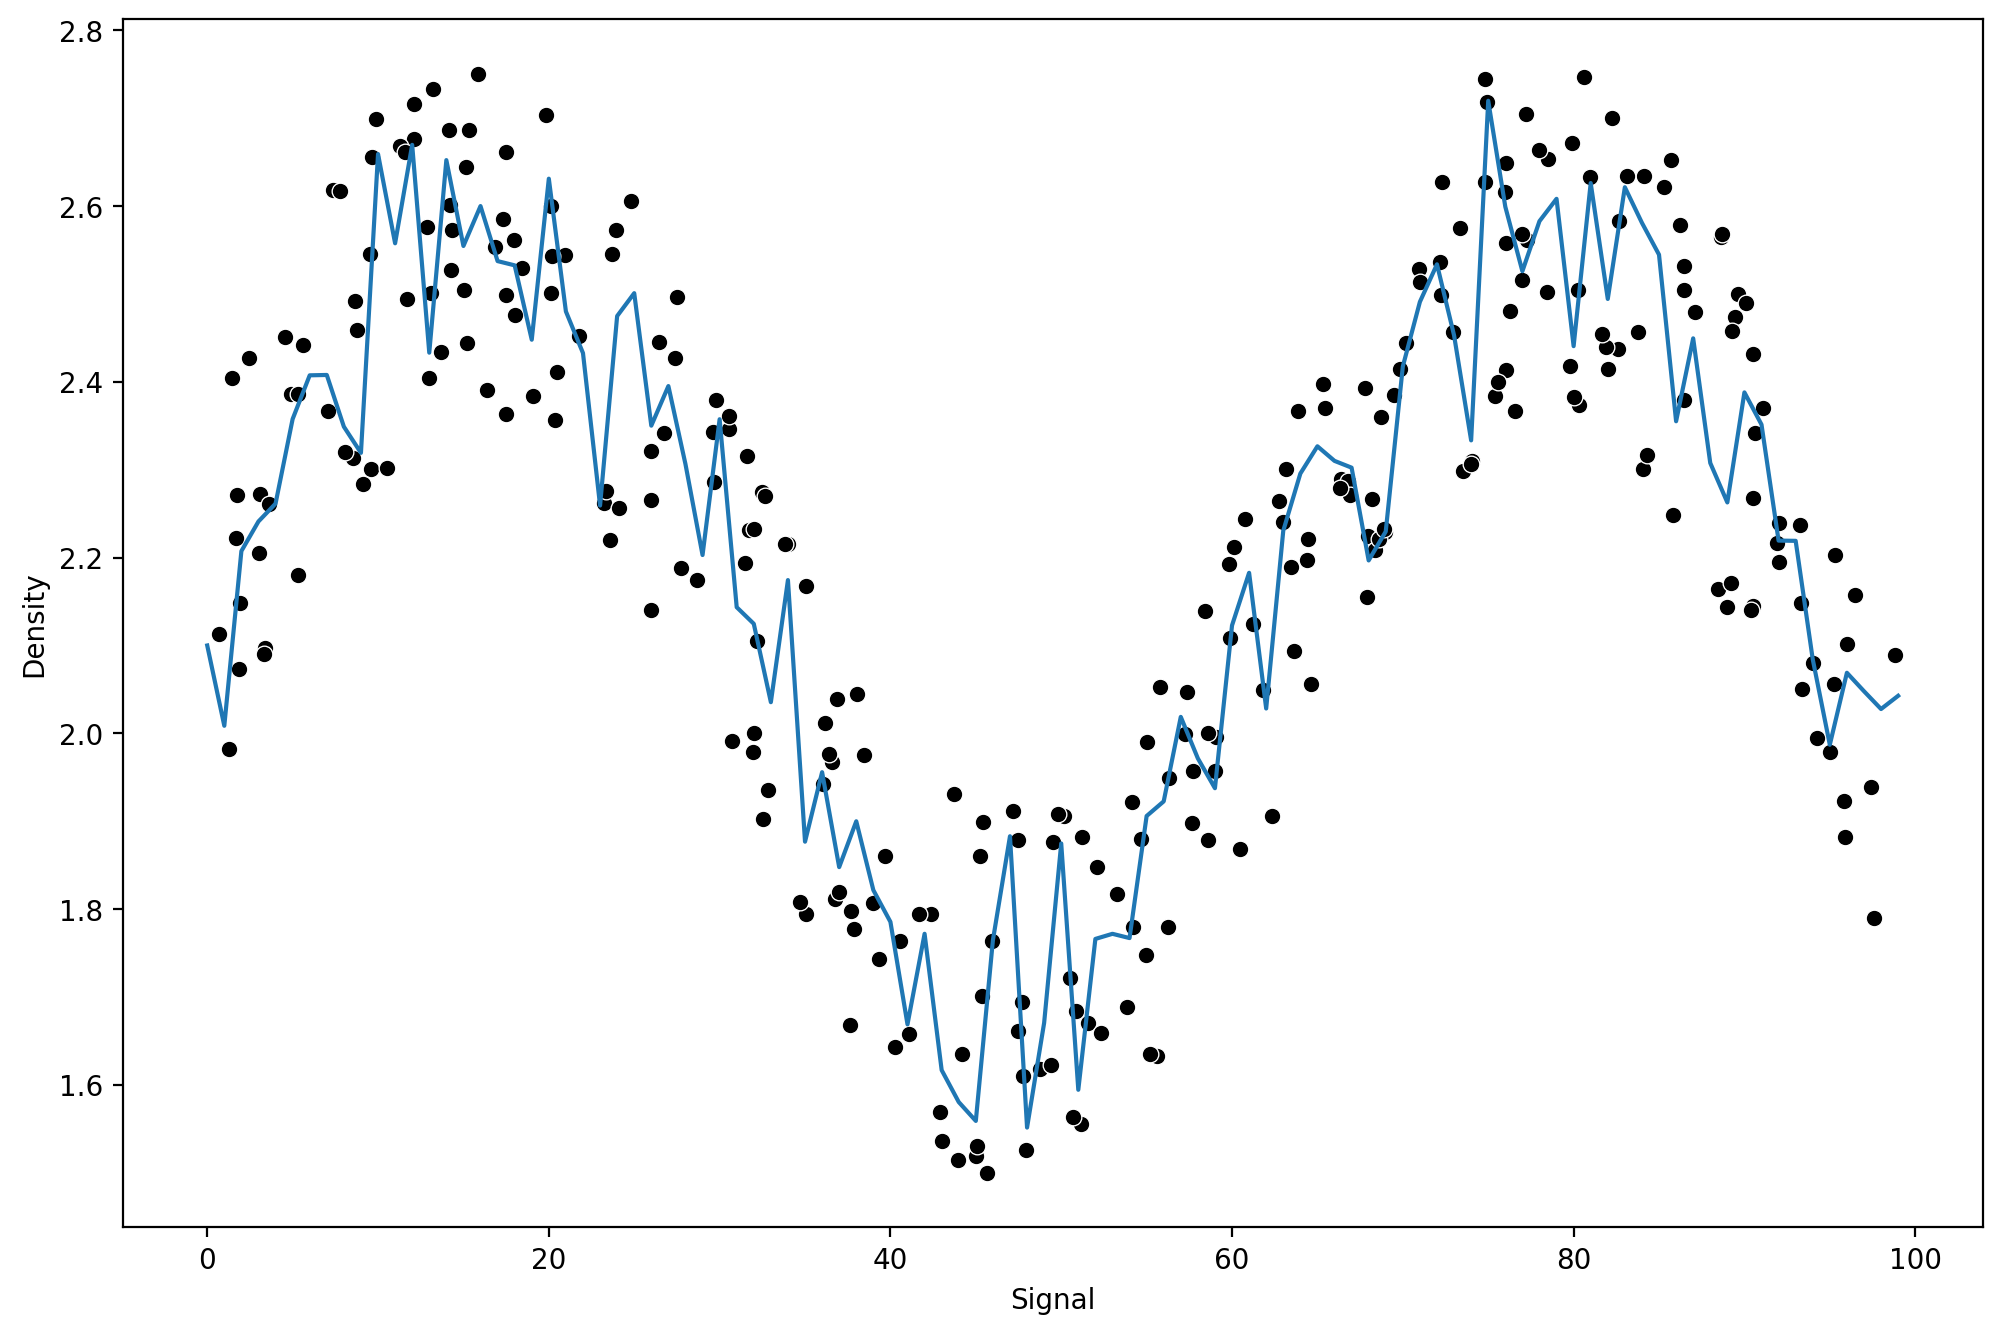

In [88]:
model = RandomForestRegressor(n_estimators=10)
run_model(model, X_train, X_test, y_train, y_test)

------

# <a name='gradient'>7) Gradient Boosting</a>

In [89]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor

MAE: 0.11318284854800689
RMSE: 0.13294148649584667


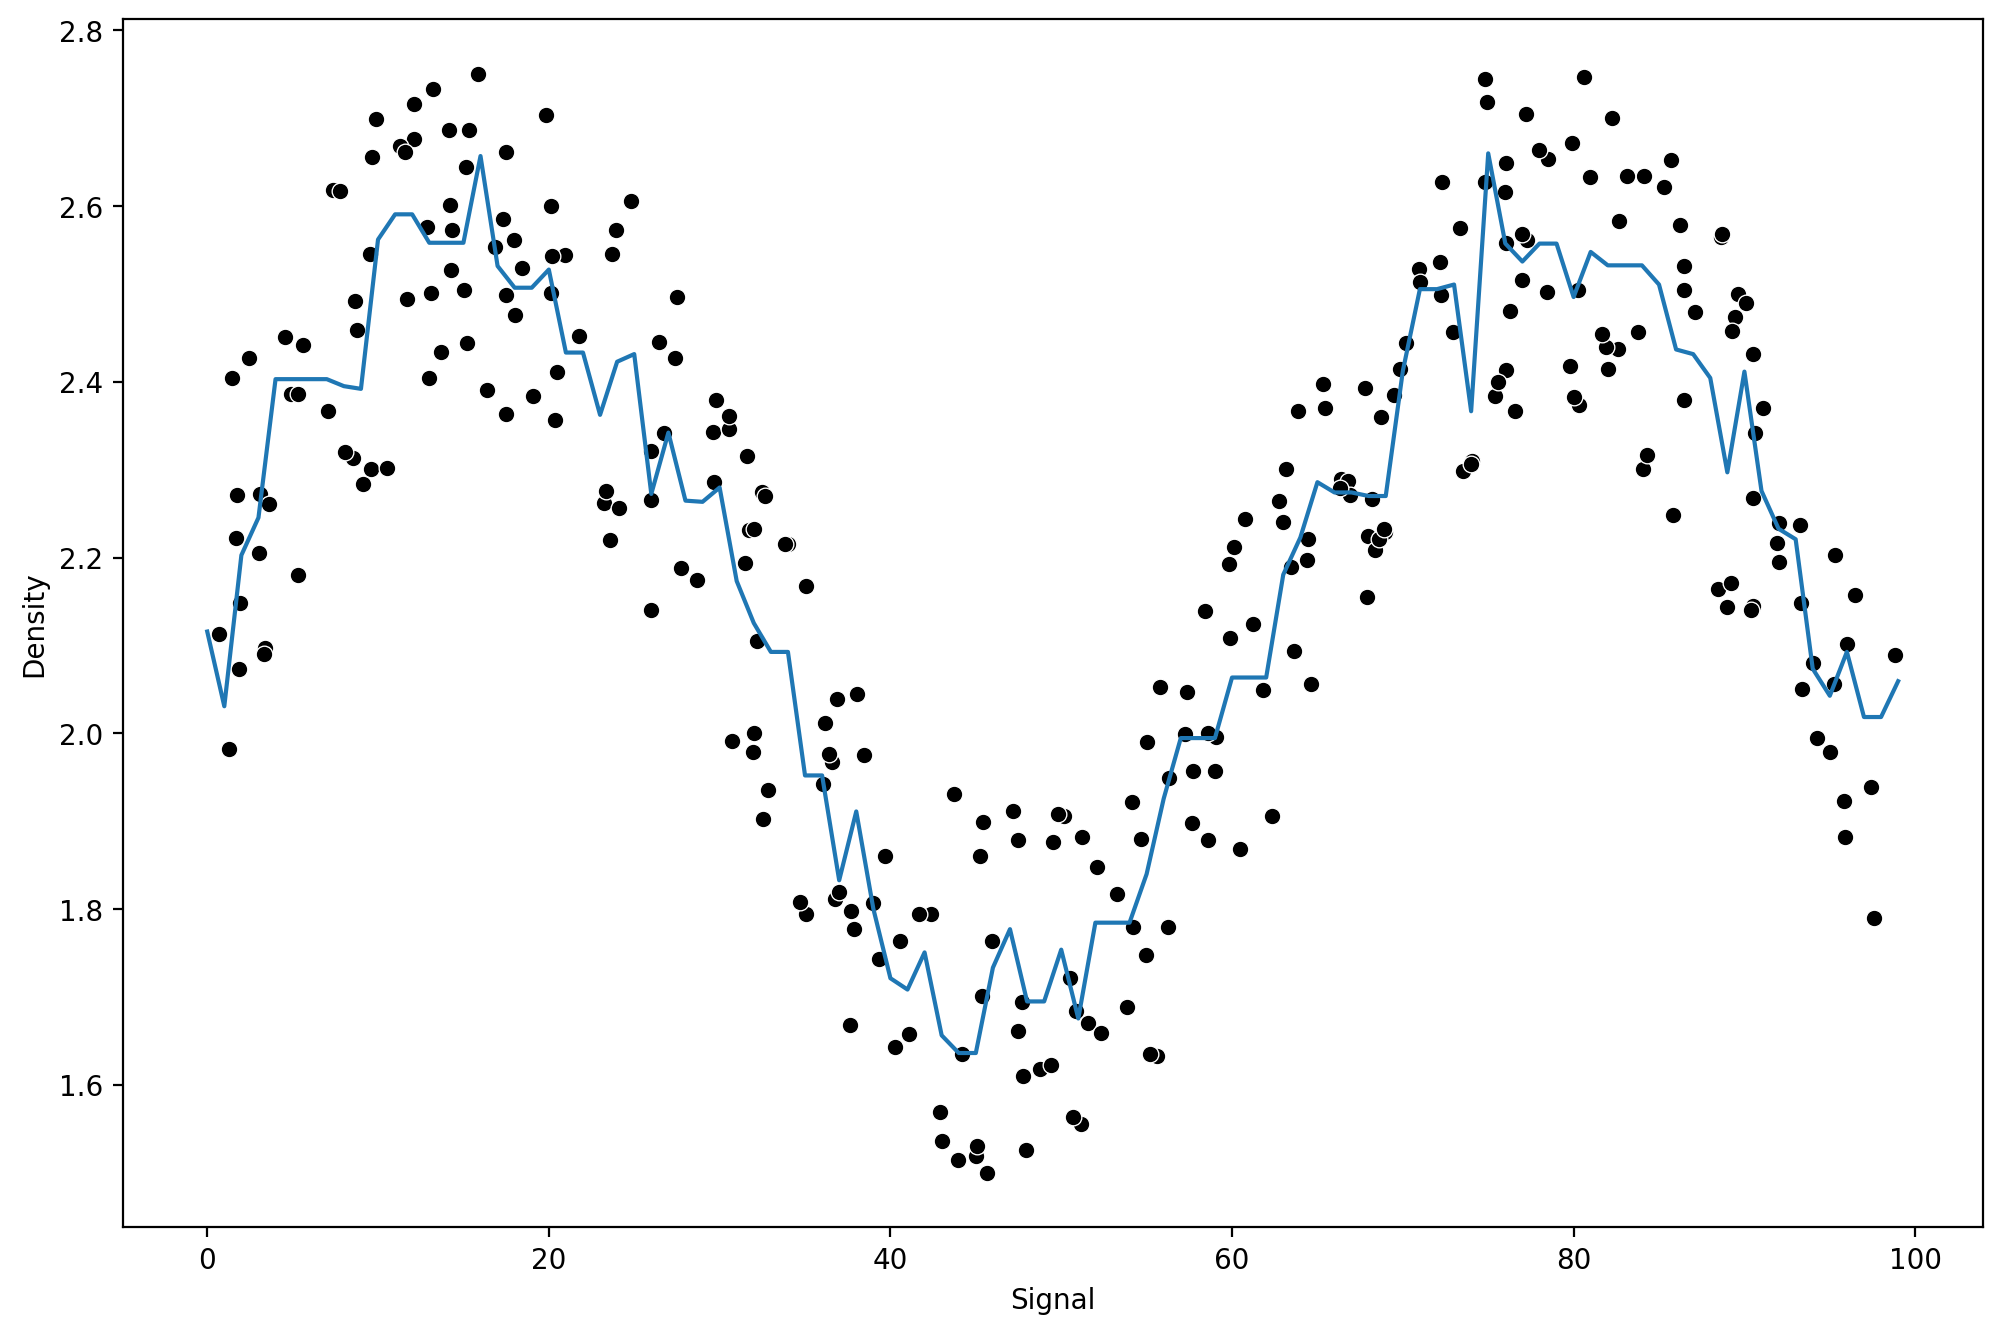

In [90]:
model = GradientBoostingRegressor()
run_model(model, X_train, X_test, y_train, y_test)

# <a name='ada'>8) Adaboost</a>

MAE: 0.11603945026886676
RMSE: 0.13507230422169955


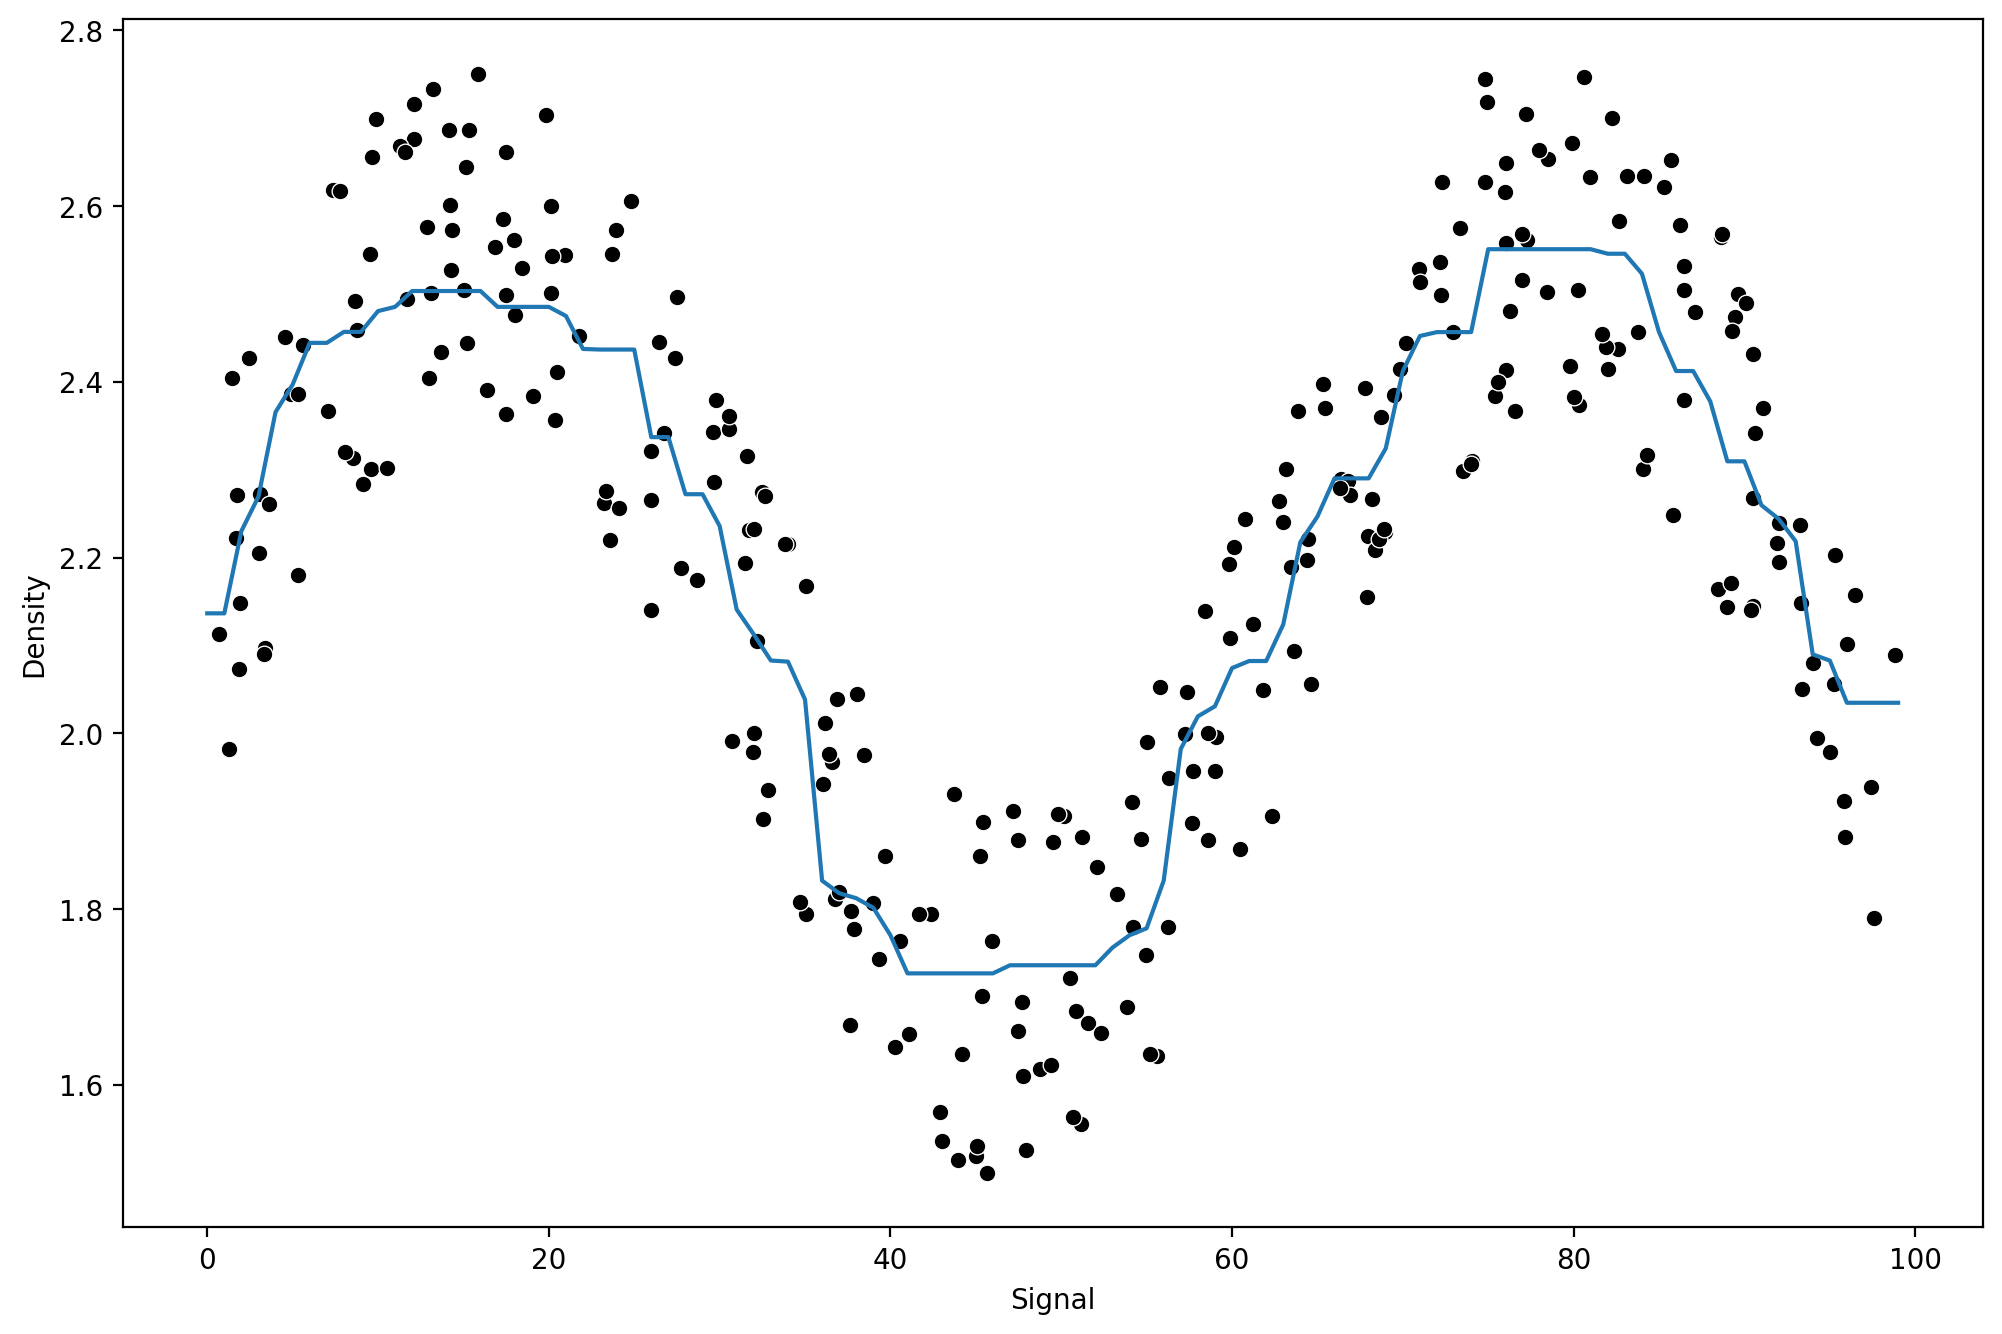

In [91]:
model = AdaBoostRegressor()
run_model(model, X_train, X_test, y_train, y_test)